# MUSHROOM CLASSIFICATION


Abans de començar farem els imports de totes les llibreries necessàries per a la realització d’aquesta pràctica i llegirem les dades del csv per carregar el nostre dataset.

In [ ]:
# afegim llibreries necessaries
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from statistics import mean
from sklearn import svm 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import warnings 
warnings.filterwarnings('ignore')


# llegim les dades del csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# carreguem dataset 
dataset = load_dataset('mushrooms.csv')
data = dataset.values

Seguidament farem una primera visualització del dataset i els seus atributs per conèixer la seva dimensió i el número d’atributs.

In [2]:
dataset

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n          k  ...                        s   
1               c         b          k  ...                        s   
2               c         b          n  ...                        s   
3               c         n          n  ...                        s   
4               w         b          k  ...                        s   
...           ...       ...        ...  ...                      ...   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                         w                      w         p          w   
1                         w                      w         p          w   
2                         w                      w         p          w   
3                         w                      w         p          w   
4                         w                      w         p          w   
...                     ...                    ...       ...        ...   
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
0              o         p                 k          s       u  
1              o         p                 n          n       g  
2              o         p                 n          n       m  
3              o         p                 k          s       u  
4              o         e                 n          a       g  
...          ...       ...               ...        ...     ...  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[8124 rows x 23 columns]

In [3]:
print("Dimensió base de dades: ", dataset.shape)
print("Número de atributs: ", dataset.columns.size)

Dimensió base de dades:  (8124, 23)
Número de atributs:  23


Com es pot observar, el archiu “mushroom.csv” proporcionat per Kaggle és una base de dades que conté métriques caracteristiques de bolets per a 8124 mostres de boletsaigua diferents. El nostre dataset té una dimensionalitat de 8124 mostres i 23 atributs diferents.

Un cop ja sabem la quantitat d’atributs que tenim i entenem la seva descripció hem de comprobar el tipus de dades que conté el nostre dataset. Per aixó executem:

In [4]:
print("Tipus d'atributs:")
dataset.dtypes

Tipus d'atributs:


class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Com es pot observar, tots els atributs del nostre dataset son de tipus object. Per tant he de transforar tots aquests valors de tipus object a valors numerics i ho farem mitjançant el següent bucle:

In [19]:
i = 0
while i < 8124:
    #class
    if dataset['class'][i] == 'p':
        dataset['class'][i] = 1
    elif dataset['class'][i] == 'e':
        dataset['class'][i] = 2
    
    #cap-shafe
    if dataset['cap-shape'][i] == 'b':
        dataset['cap-shape'][i] = 1
    elif dataset['cap-shape'][i] == 'c':
        dataset['cap-shape'][i] = 2
    elif dataset['cap-shape'][i] == 'x':
        dataset['cap-shape'][i] = 3
    elif dataset['cap-shape'][i] == 'f':
        dataset['cap-shape'][i] = 4
    elif dataset['cap-shape'][i] == 'k':
        dataset['cap-shape'][i] = 5
    elif dataset['cap-shape'][i] == 's':
        dataset['cap-shape'][i] = 6
        
    #cap-surface
    if dataset['cap-surface'][i] == 'f':
        dataset['cap-surface'][i] = 1
    elif dataset['cap-surface'][i] == 'g':
        dataset['cap-surface'][i] = 2
    elif dataset['cap-surface'][i] == 'y':
        dataset['cap-surface'][i] = 3
    elif dataset['cap-surface'][i] == 's':
        dataset['cap-surface'][i] = 4
        
    #cap-color
    if dataset['cap-color'][i] == 'n':
        dataset['cap-color'][i] = 1
    elif dataset['cap-color'][i] == 'b':
        dataset['cap-color'][i] = 2
    elif dataset['cap-color'][i] == 'c':
        dataset['cap-color'][i] = 3
    elif dataset['cap-color'][i] == 'g':
        dataset['cap-color'][i] = 4
    elif dataset['cap-color'][i] == 'r':
        dataset['cap-color'][i] = 5
    elif dataset['cap-color'][i] == 'p':
        dataset['cap-color'][i] = 6
    elif dataset['cap-color'][i] == 'u':
        dataset['cap-color'][i] = 7
    elif dataset['cap-color'][i] == 'e':
        dataset['cap-color'][i] = 8
    elif dataset['cap-color'][i] == 'w':
        dataset['cap-color'][i] = 9
    elif dataset['cap-color'][i] == 'y':
        dataset['cap-color'][i] = 10
        
    #bruises
    if dataset['bruises'][i] == 't':
        dataset['bruises'][i] = 1
    elif dataset['bruises'][i] == 'f':
        dataset['bruises'][i] = 2
    
    #odor
    if dataset['odor'][i] == 'a':
        dataset['odor'][i] = 1
    elif dataset['odor'][i] == 'l':
        dataset['odor'][i] = 2
    elif dataset['odor'][i] == 'c':
        dataset['odor'][i] = 3
    elif dataset['odor'][i] == 'y':
        dataset['odor'][i] = 4
    elif dataset['odor'][i] == 'f':
        dataset['odor'][i] = 5
    elif dataset['odor'][i] == 'm':
        dataset['odor'][i] = 6
    elif dataset['odor'][i] == 'n':
        dataset['odor'][i] = 7
    elif dataset['odor'][i] == 'p':
        dataset['odor'][i] = 8
    elif dataset['odor'][i] == 's':
        dataset['odor'][i] = 9
        
    #gill-attachment
    if dataset['gill-attachment'][i] == 'a':
        dataset['gill-attachment'][i] = 1
    elif dataset['gill-attachment'][i] == 'd':
        dataset['gill-attachment'][i] = 2
    elif dataset['gill-attachment'][i] == 'f':
        dataset['gill-attachment'][i] = 3
    elif dataset['gill-attachment'][i] == 'n':
        dataset['gill-attachment'][i] = 4
        
    #gill-spacing
    if dataset['gill-spacing'][i] == 'c':
        dataset['gill-spacing'][i] = 1
    elif dataset['gill-spacing'][i] == 'w':
        dataset['gill-spacing'][i] = 2
    elif dataset['gill-spacing'][i] == 'd':
        dataset['gill-spacing'][i] = 3
    
    #gill-size
    if dataset['gill-size'][i] == 'b':
        dataset['gill-size'][i] = 1
    elif dataset['gill-size'][i] == 'n':
        dataset['gill-size'][i] = 2
    
    #gill-color
    if dataset['gill-color'][i] == 'k':
        dataset['gill-color'][i] = 1
    elif dataset['gill-color'][i] == 'n':
        dataset['gill-color'][i] = 2
    elif dataset['gill-color'][i] == 'b':
        dataset['gill-color'][i] = 3
    elif dataset['gill-color'][i] == 'h':
        dataset['gill-color'][i] = 4
    elif dataset['gill-color'][i] == 'g':
        dataset['gill-color'][i] = 5
    elif dataset['gill-color'][i] == 'r':
        dataset['gill-color'][i] = 6
    elif dataset['gill-color'][i] == 'o':
        dataset['gill-color'][i] = 7
    elif dataset['gill-color'][i] == 'p':
        dataset['gill-color'][i] = 8
    elif dataset['gill-color'][i] == 'u':
        dataset['gill-color'][i] = 9
    elif dataset['gill-color'][i] == 'e':
        dataset['gill-color'][i] = 10
    elif dataset['gill-color'][i] == 'w':
        dataset['gill-color'][i] = 11
    elif dataset['gill-color'][i] == 'y':
        dataset['gill-color'][i] = 12
    
    #stalk-shape
    if dataset['stalk-shape'][i] == 'e':
        dataset['stalk-shape'][i] = 1
    elif dataset['stalk-shape'][i] == 't':
        dataset['stalk-shape'][i] = 2
    
    #stalk-root
    if dataset['stalk-root'][i] == 'b':
        dataset['stalk-root'][i] = 1
    elif dataset['stalk-root'][i] == 'c':
        dataset['stalk-root'][i] = 2
    elif dataset['stalk-root'][i] == 'u':
        dataset['stalk-root'][i] = 3
    elif dataset['stalk-root'][i] == 'e':
        dataset['stalk-root'][i] = 4
    elif dataset['stalk-root'][i] == 'z':
        dataset['stalk-root'][i] = 5
    elif dataset['stalk-root'][i] == 'r':
        dataset['stalk-root'][i] = 6
    elif dataset['stalk-root'][i] == '?':
        dataset['stalk-root'][i] = 7
    
    #stalk-surface-above-ring
    if dataset['stalk-surface-above-ring'][i] == 'f':
        dataset['stalk-surface-above-ring'][i] = 1
    elif dataset['stalk-surface-above-ring'][i] == 'y':
        dataset['stalk-surface-above-ring'][i] = 2
    elif dataset['stalk-surface-above-ring'][i] == 'k':
        dataset['stalk-surface-above-ring'][i] = 3
    elif dataset['stalk-surface-above-ring'][i] == 's':
        dataset['stalk-surface-above-ring'][i] = 4
    
    #stalk-surface-below-ring
    if dataset['stalk-surface-below-ring'][i] == 'f':
        dataset['stalk-surface-below-ring'][i] = 1
    elif dataset['stalk-surface-below-ring'][i] == 'y':
        dataset['stalk-surface-below-ring'][i] = 2
    elif dataset['stalk-surface-below-ring'][i] == 'k':
        dataset['stalk-surface-below-ring'][i] = 3
    elif dataset['stalk-surface-below-ring'][i] == 's':
        dataset['stalk-surface-below-ring'][i] = 4
    
    #stalk-color-above-ring
    if dataset['stalk-color-above-ring'][i] == 'n':
        dataset['stalk-color-above-ring'][i] = 1
    elif dataset['stalk-color-above-ring'][i] == 'b':
        dataset['stalk-color-above-ring'][i] = 2
    elif dataset['stalk-color-above-ring'][i] == 'c':
        dataset['stalk-color-above-ring'][i] = 3
    elif dataset['stalk-color-above-ring'][i] == 'g':
        dataset['stalk-color-above-ring'][i] = 4
    elif dataset['stalk-color-above-ring'][i] == 'o':
        dataset['stalk-color-above-ring'][i] = 5
    elif dataset['stalk-color-above-ring'][i] == 'p':
        dataset['stalk-color-above-ring'][i] = 6
    elif dataset['stalk-color-above-ring'][i] == 'e':
        dataset['stalk-color-above-ring'][i] = 7
    elif dataset['stalk-color-above-ring'][i] == 'w':
        dataset['stalk-color-above-ring'][i] = 8
    elif dataset['stalk-color-above-ring'][i] == 'y':
        dataset['stalk-color-above-ring'][i] = 9
    
    #stalk-color-below-ring
    if dataset['stalk-color-below-ring'][i] == 'n':
        dataset['stalk-color-below-ring'][i] = 1
    elif dataset['stalk-color-below-ring'][i] == 'b':
        dataset['stalk-color-below-ring'][i] = 2
    elif dataset['stalk-color-below-ring'][i] == 'c':
        dataset['stalk-color-below-ring'][i] = 3
    elif dataset['stalk-color-below-ring'][i] == 'g':
        dataset['stalk-color-below-ring'][i] = 4
    elif dataset['stalk-color-below-ring'][i] == 'o':
        dataset['stalk-color-below-ring'][i] = 5
    elif dataset['stalk-color-below-ring'][i] == 'p':
        dataset['stalk-color-below-ring'][i] = 6
    elif dataset['stalk-color-below-ring'][i] == 'e':
        dataset['stalk-color-below-ring'][i] = 7
    elif dataset['stalk-color-below-ring'][i] == 'w':
        dataset['stalk-color-below-ring'][i] = 8
    elif dataset['stalk-color-below-ring'][i] == 'y':
        dataset['stalk-color-below-ring'][i] = 9
    
    #veil-type
    if dataset['veil-type'][i] == 'p':
        dataset['veil-type'][i] = 1
    elif dataset['veil-type'][i] == 'u':
        dataset['veil-type'][i] = 2
    
    #veil-color
    if dataset['veil-color'][i] == 'n':
        dataset['veil-color'][i] = 1
    elif dataset['veil-color'][i] == 'o':
        dataset['veil-color'][i] = 2
    elif dataset['veil-color'][i] == 'w':
        dataset['veil-color'][i] = 3
    elif dataset['veil-color'][i] == 'y':
        dataset['veil-color'][i] = 4
    
    #ring-number
    if dataset['ring-number'][i] == 'n':
        dataset['ring-number'][i] = 1
    elif dataset['ring-number'][i] == 'o':
        dataset['ring-number'][i] = 2
    elif dataset['ring-number'][i] == 't':
        dataset['ring-number'][i] = 3
    
    #ring-type
    if dataset['ring-type'][i] == 'c':
        dataset['ring-type'][i] = 1
    elif dataset['ring-type'][i] == 'e':
        dataset['ring-type'][i] = 2
    elif dataset['ring-type'][i] == 'f':
        dataset['ring-type'][i] = 3
    elif dataset['ring-type'][i] == 'l':
        dataset['ring-type'][i] = 4
    elif dataset['ring-type'][i] == 'n':
        dataset['ring-type'][i] = 5
    elif dataset['ring-type'][i] == 'p':
        dataset['ring-type'][i] = 6
    elif dataset['ring-type'][i] == 's':
        dataset['ring-type'][i] = 7
    elif dataset['ring-type'][i] == 'z':
        dataset['ring-type'][i] = 8

    #spore-print-color
    if dataset['spore-print-color'][i] == 'k':
        dataset['spore-print-color'][i] = 1
    elif dataset['spore-print-color'][i] == 'n':
        dataset['spore-print-color'][i] = 2
    elif dataset['spore-print-color'][i] == 'b':
        dataset['spore-print-color'][i] = 3
    elif dataset['spore-print-color'][i] == 'h':
        dataset['spore-print-color'][i] = 4
    elif dataset['spore-print-color'][i] == 'r':
        dataset['spore-print-color'][i] = 5
    elif dataset['spore-print-color'][i] == 'o':
        dataset['spore-print-color'][i] = 6
    elif dataset['spore-print-color'][i] == 'u':
        dataset['spore-print-color'][i] = 7
    elif dataset['spore-print-color'][i] == 'w':
        dataset['spore-print-color'][i] = 8
    elif dataset['spore-print-color'][i] == 'y':
        dataset['spore-print-color'][i] = 9
    
    #population
    if dataset['population'][i] == 'a':
        dataset['population'][i] = 1
    elif dataset['population'][i] == 'c':
        dataset['population'][i] = 2
    elif dataset['population'][i] == 'n':
        dataset['population'][i] = 3
    elif dataset['population'][i] == 's':
        dataset['population'][i] = 4
    elif dataset['population'][i] == 'v':
        dataset['population'][i] = 5
    elif dataset['population'][i] == 'y':
        dataset['population'][i] = 6
    
    #habitat
    if dataset['habitat'][i] == 'g':
        dataset['habitat'][i] = 1
    elif dataset['habitat'][i] == 'l':
        dataset['habitat'][i] = 2
    elif dataset['habitat'][i] == 'm':
        dataset['habitat'][i] = 3
    elif dataset['habitat'][i] == 'p':
        dataset['habitat'][i] = 4
    elif dataset['habitat'][i] == 'u':
        dataset['habitat'][i] = 5
    elif dataset['habitat'][i] == 'w':
        dataset['habitat'][i] = 6
    elif dataset['habitat'][i] == 'd':
        dataset['habitat'][i] = 7
        

    i += 1

In [20]:

dataset['class'] = dataset['class'].astype('int')

dataset['cap-shape'] = dataset['cap-shape'].astype('int')

dataset['cap-surface'] = dataset['cap-surface'].astype('int')  

dataset['cap-color'] = dataset['cap-color'].astype('int')  

dataset['bruises'] = dataset['bruises'].astype('int')    

dataset['odor'] = dataset['odor'].astype('int') 

dataset['gill-attachment'] = dataset['gill-attachment'].astype('int') 

dataset['gill-spacing'] = dataset['gill-spacing'].astype('int') 

dataset['gill-size'] = dataset['gill-size'].astype('int') 

dataset['gill-color'] = dataset['gill-color'].astype('int') 

dataset['stalk-shape'] = dataset['stalk-shape'].astype('int')

dataset['stalk-root'] = dataset['stalk-root'].astype('int')

dataset['stalk-surface-above-ring'] = dataset['stalk-surface-above-ring'].astype('int')  

dataset['stalk-surface-below-ring'] = dataset['stalk-surface-below-ring'].astype('int') 

dataset['stalk-color-above-ring'] = dataset['stalk-color-above-ring'].astype('int')  

dataset['stalk-color-below-ring'] = dataset['stalk-color-below-ring'].astype('int') 

dataset['veil-type'] = dataset['veil-type'].astype('int') 

dataset['veil-color'] = dataset['veil-color'].astype('int')  

dataset['ring-number'] = dataset['ring-number'].astype('int')  

dataset['ring-type'] = dataset['ring-type'].astype('int')  

dataset['spore-print-color'] = dataset['spore-print-color'].astype('int')

dataset['population'] = dataset['population'].astype('int')   

dataset['habitat'] = dataset['habitat'].astype('int')    

Un cop executats coprovarem que s'hagin transforat de manera correcta:

In [7]:
dataset

class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          3            4          1        1     8   
1         2          3            4         10        1     1   
2         2          1            4          9        1     2   
3         1          3            3          9        1     8   
4         2          3            4          4        2     7   
...     ...        ...          ...        ...      ...   ...   
8119      2          5            4          1        2     7   
8120      2          3            4          1        2     7   
8121      2          4            4          1        2     7   
8122      1          5            3          1        2     4   
8123      2          3            4          1        2     7   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   3             1          2           1  ...   
1                   3             1          1           1  ...   
2                   3             1          1           2  ...   
3                   3             1          2           2  ...   
4                   3             2          1           1  ...   
...               ...           ...        ...         ...  ...   
8119                1             1          1          12  ...   
8120                1             1          1          12  ...   
8121                1             1          1           2  ...   
8122                3             1          2           3  ...   
8123                1             1          1          12  ...   

      stalk-surface-below-ring  stalk-color-above-ring  \
0                            4                       8   
1                            4                       8   
2                            4                       8   
3                            4                       8   
4                            4                       8   
...                        ...                     ...   
8119                         4                       5   
8120                         4                       5   
8121                         4                       5   
8122                         3                       8   
8123                         4                       5   

      stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
0                          8          1           3            2          6   
1                          8          1           3            2          6   
2                          8          1           3            2          6   
3                          8          1           3            2          6   
4                          8          1           3            2          2   
...                      ...        ...         ...          ...        ...   
8119                       5          1           2            2          6   
8120                       5          1           1            2          6   
8121                       5          1           2            2          6   
8122                       8          1           3            2          2   
8123                       5          1           2            2          6   

      spore-print-color  population  habitat  
0                     1           4        5  
1                     2           3        1  
2                     2           3        3  
3                     1           4        5  
4                     2           1        1  
...                 ...         ...      ...  
8119                  3           2        2  
8120                  3           5        2  
8121                  3           2        2  
8122                  8           5        2  
8123                  6           2        2  

[8124 rows x 23 columns]

In [8]:
print("Tipus d'atributs:")
dataset.dtypes

Tipus d'atributs:


class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

Com es pot observar ara tots els.atributs son numerics. La majoria són atributs continus menys la class que és un atribut binari, aixo vol dir que tomarà el valor de 2 quan el bolet sigui segur per al consum humà i 1 quan no sigui verinós.

Amb l’anterior afirmació deduim que el nostre atribut target serà la venenositat “Class”, el qual indica les 2 clases que pot tenir la nostra mostra:

Clase 1: Verinós

Clase 2: No verinós

A continuació visualitzarem la correlació que te el nostre atribut target “Class” amb la resta d’atributs.

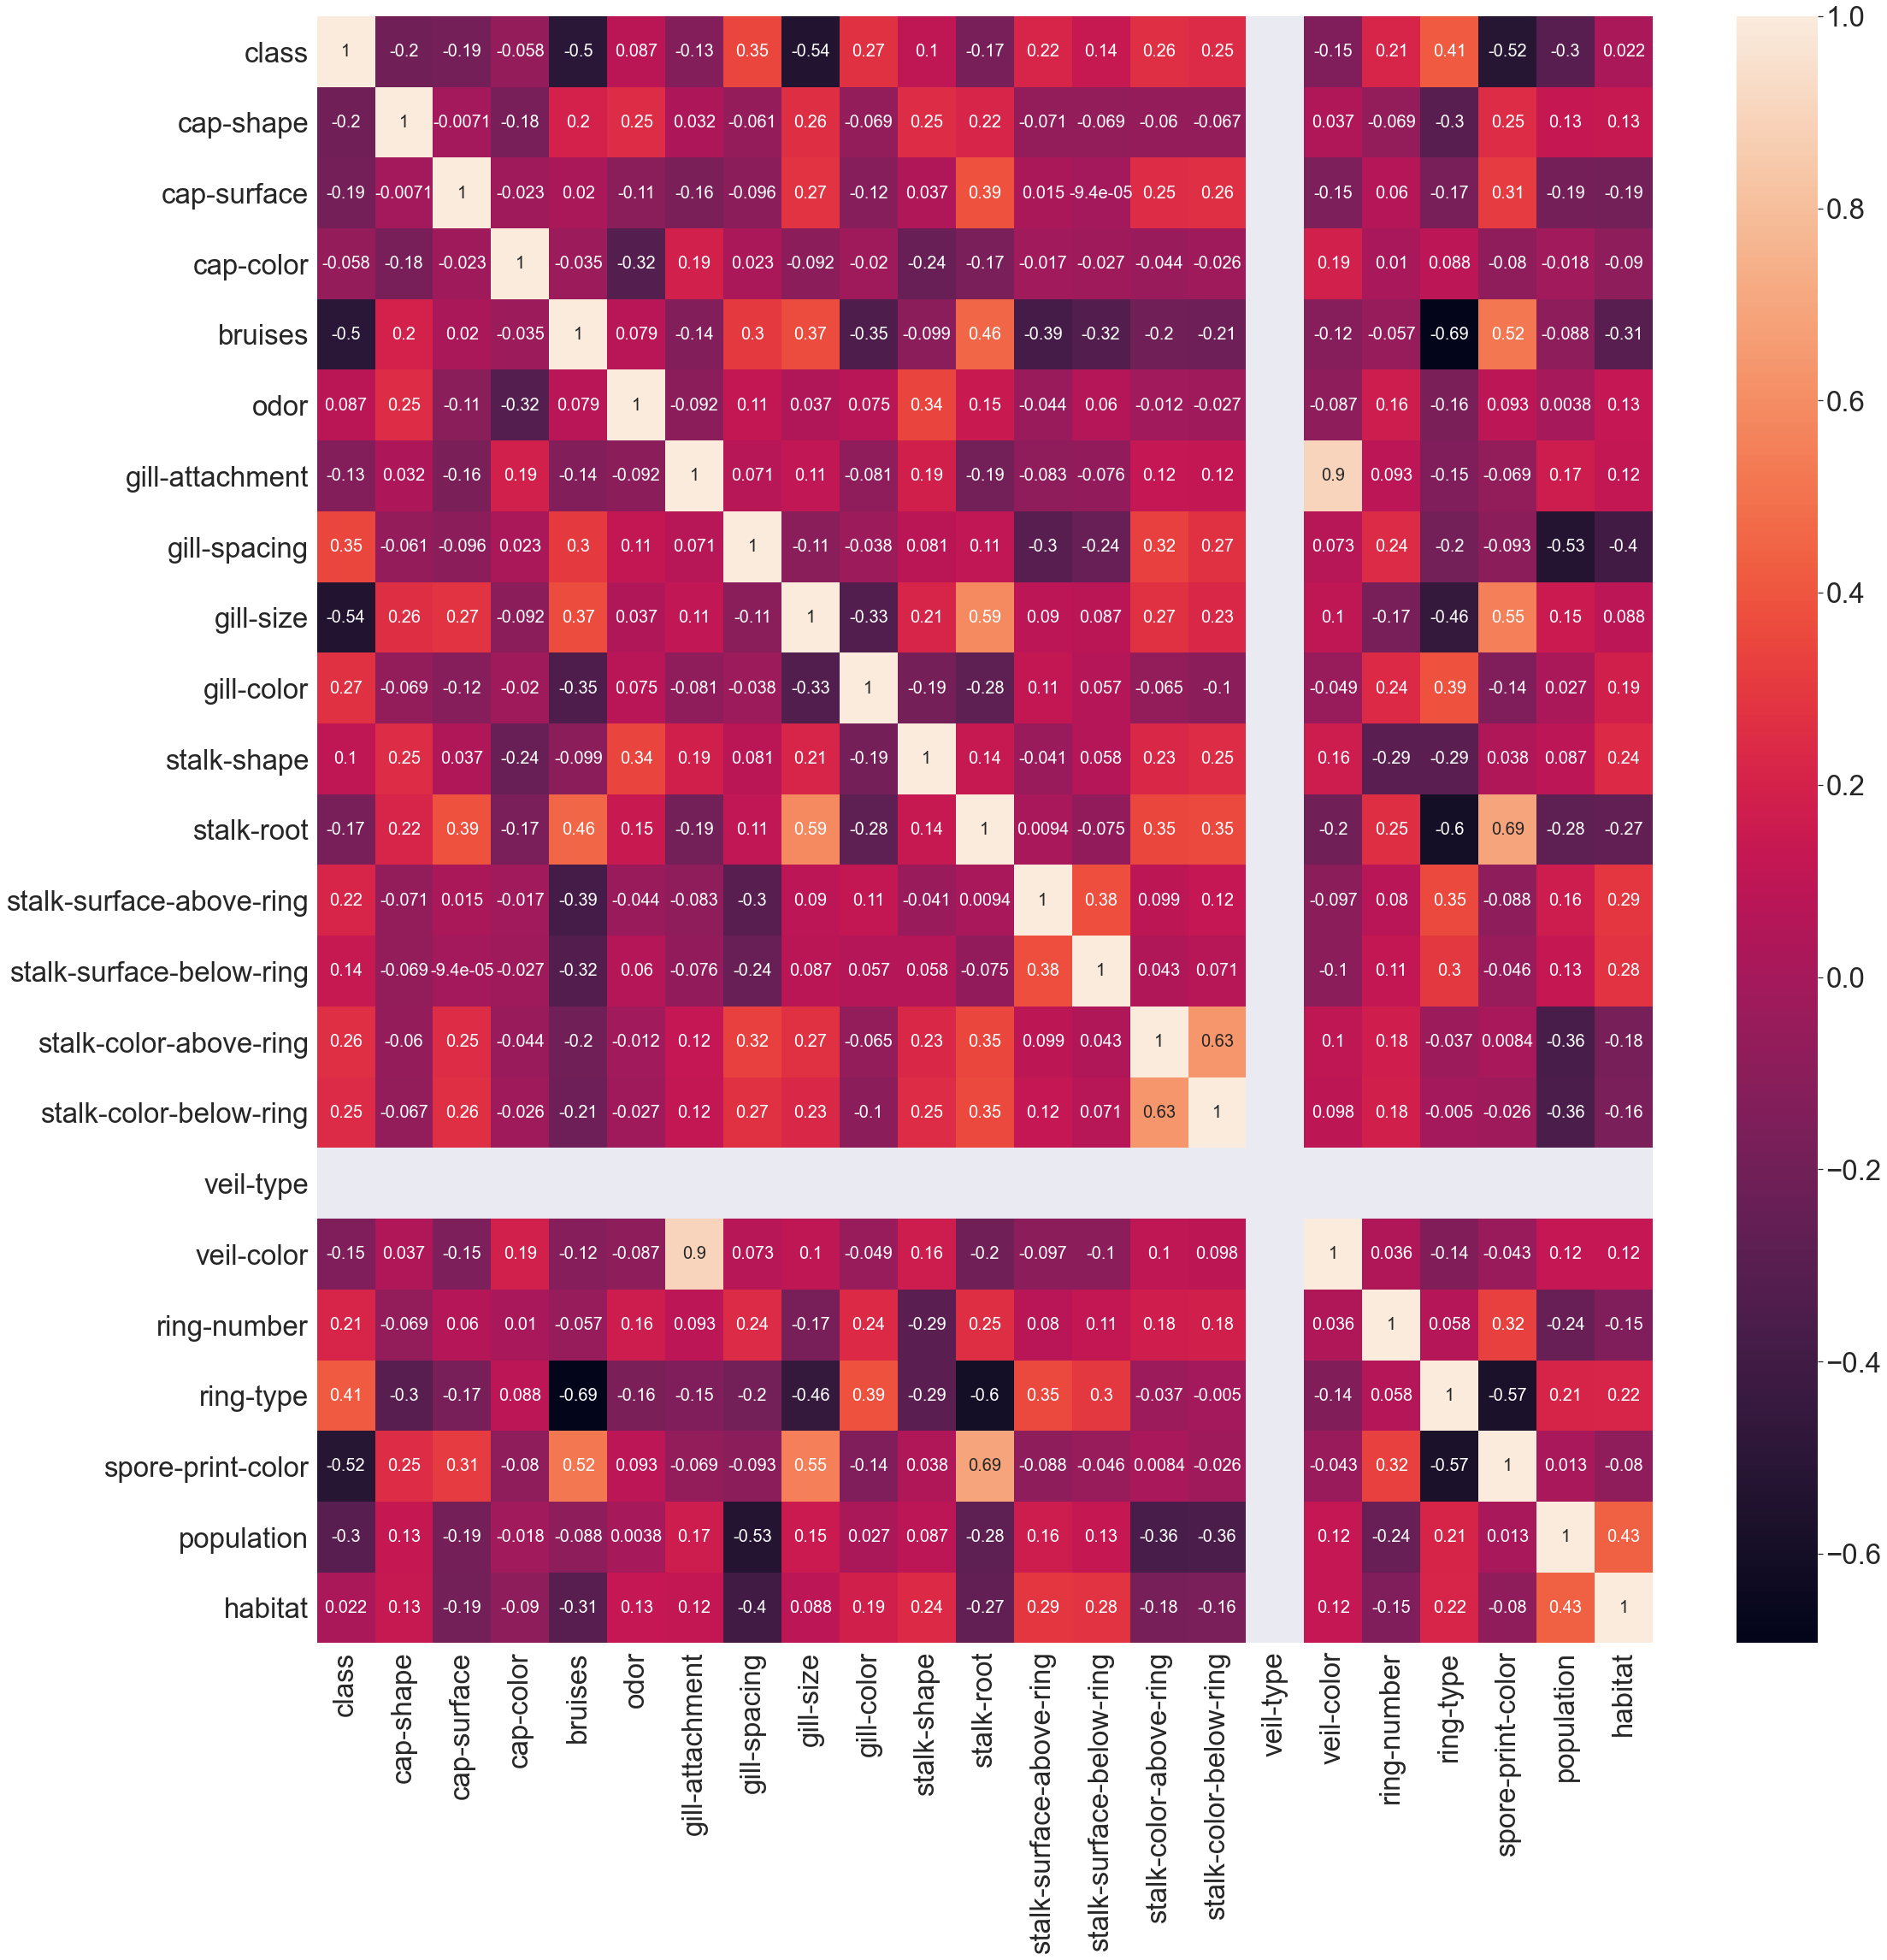

In [9]:
sns.set(font_scale = 3)
correlacio = dataset.corr()
plt.figure(figsize = (35, 35))
ax = sns.heatmap(correlacio, annot=True, annot_kws={"size": 20})

Com podem observar l'atribut "veil-type" no te correlació amb cap valor, aix que comprovarem si tots els valors d'aquest atribut son iguals.

In [10]:

if (dataset['veil-type'] == dataset['veil-type'][0]).all():
    print("All values are equal in column 'veil-type'")
else:
    print("All values are not equal  in column 'veil-type'")

All values are equal in column 'veil-type'


Com tots els valors son iguals podem determinar que aquest atribut no ens aporta informació, per tant l'eliminarem. 

In [11]:

del dataset['veil-type']

Tornem a visualitzar la correlació de l'atribut "class" pero ara sense l'atribut "veil-type"

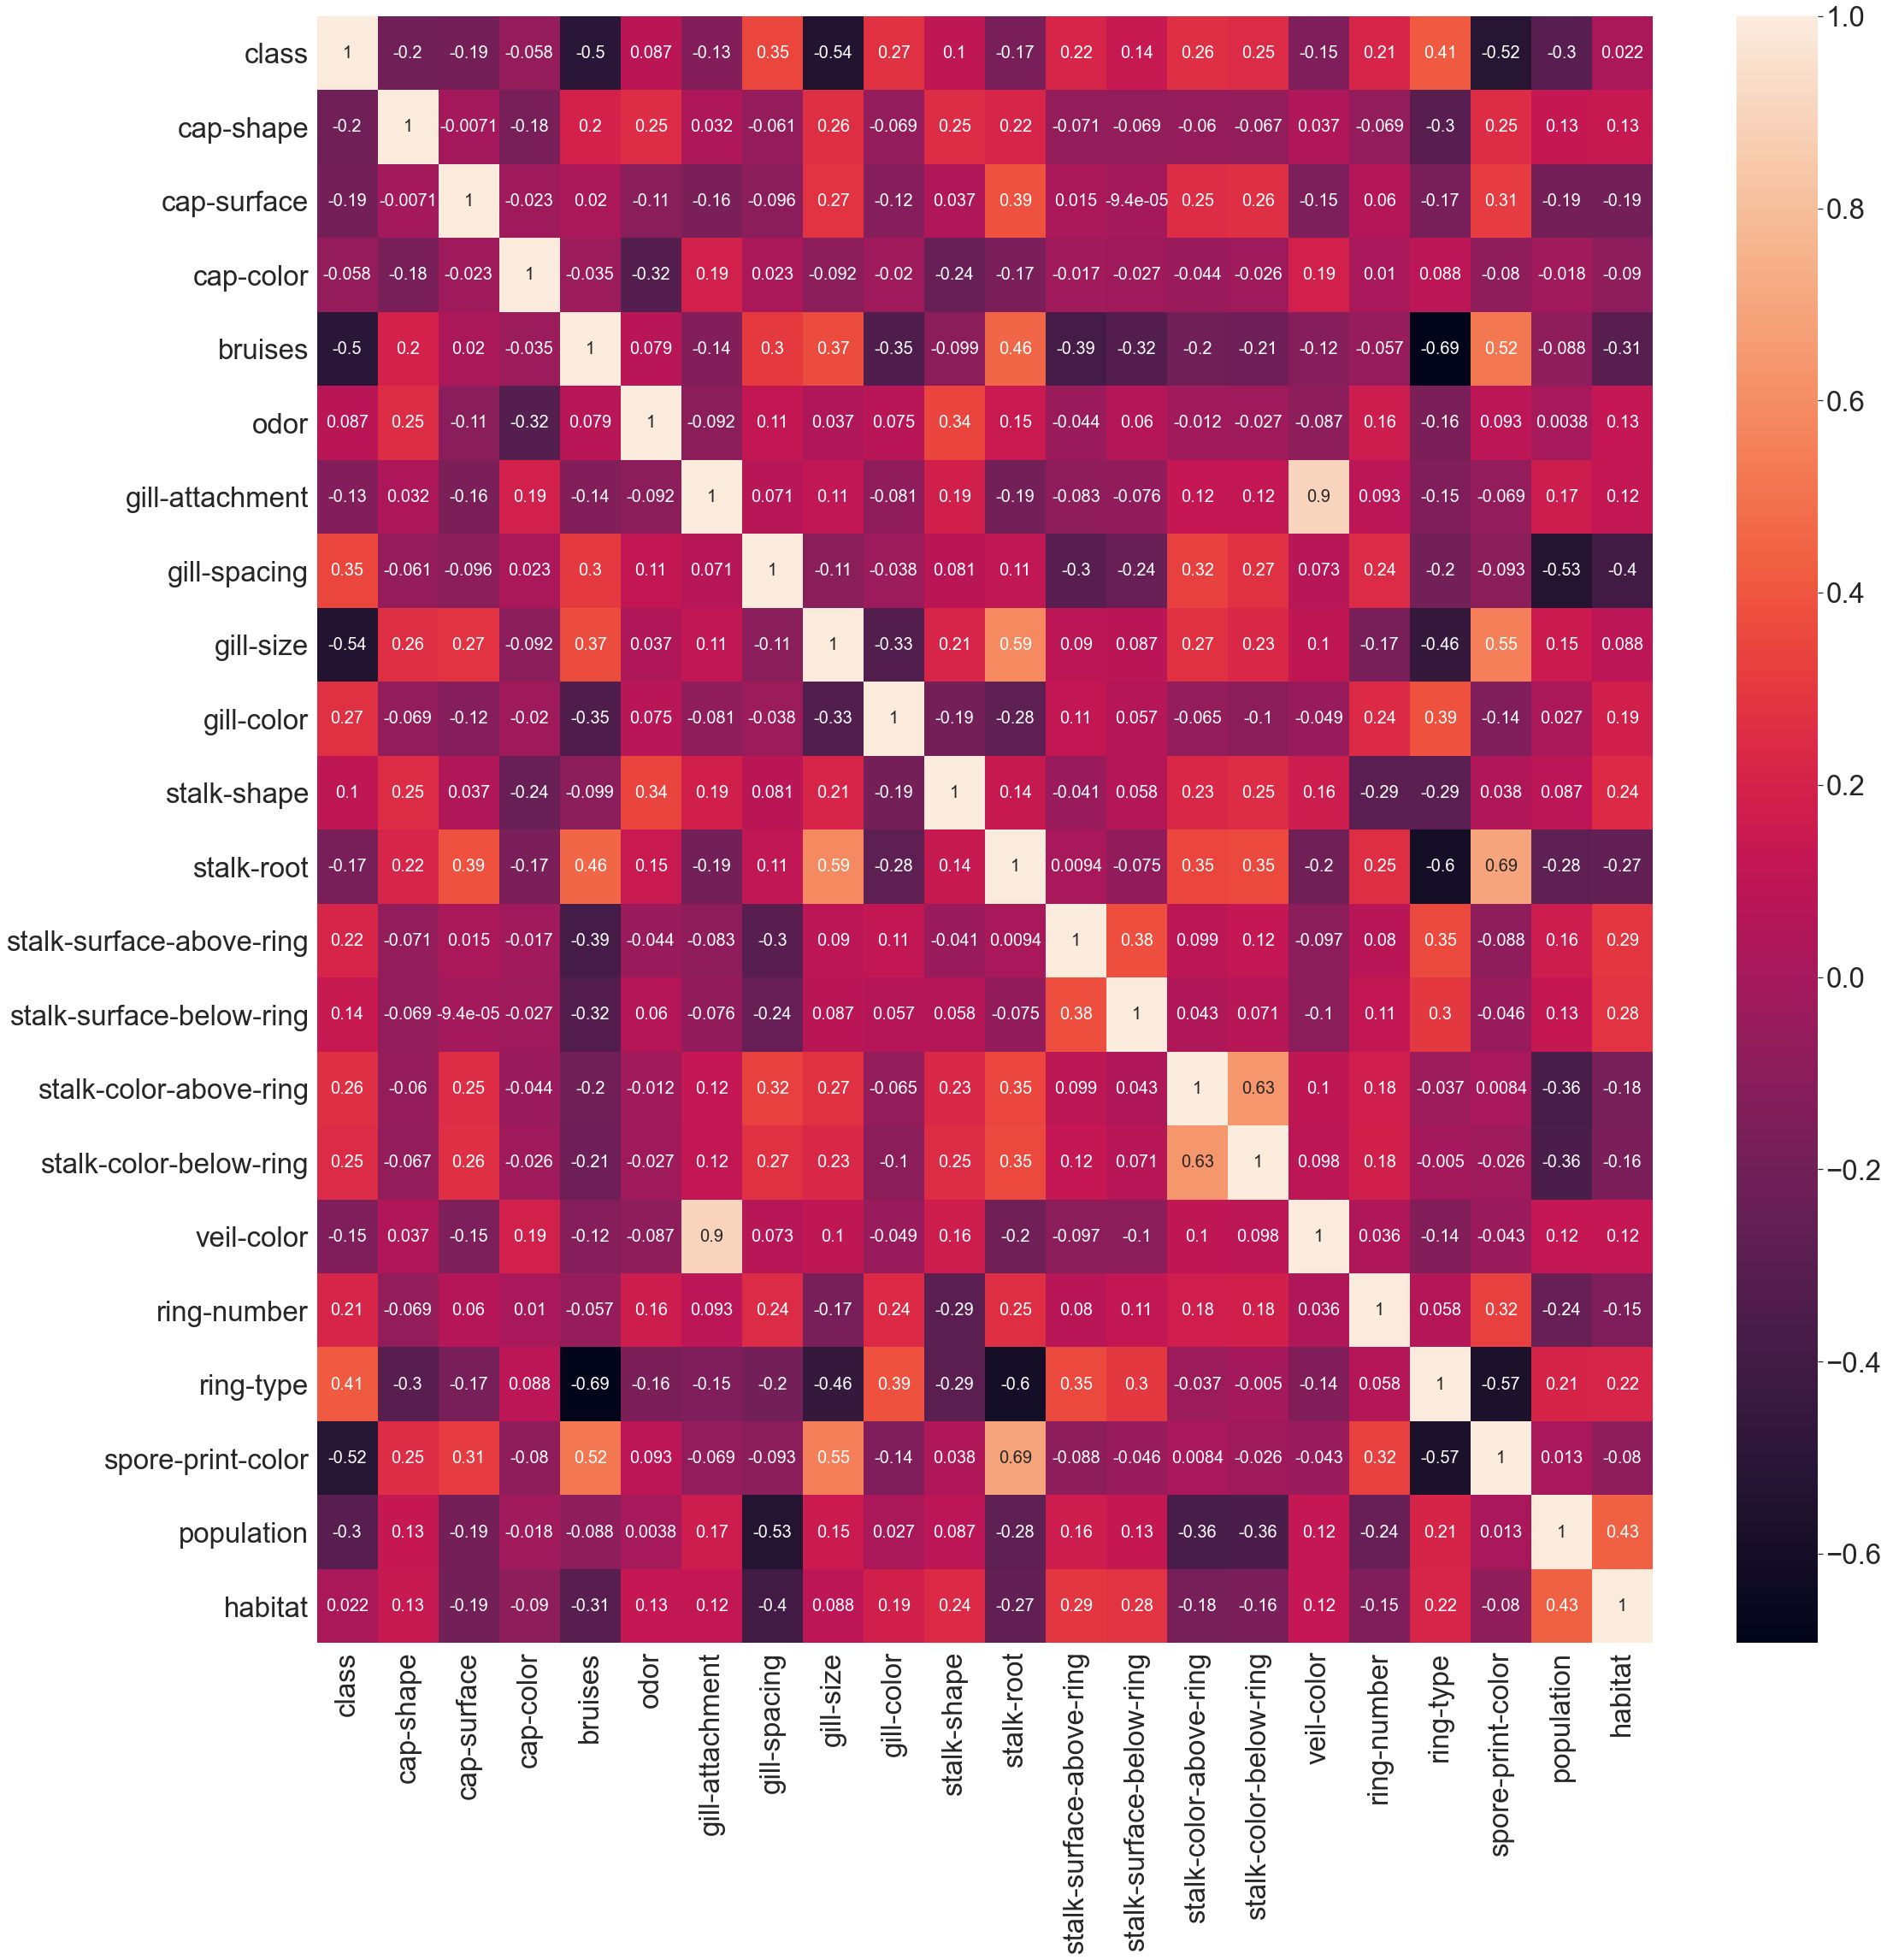

In [12]:
sns.set(font_scale = 3)
correlacio = dataset.corr()
plt.figure(figsize = (35, 35))
ax = sns.heatmap(correlacio, annot=True, annot_kws={"size": 20})

Com es pot observar a la matriu de correlació, en general els atributs estan mitjanament correlacionats entre ells. El nostre atribut target “Class” obté la máxima correlació amb l’atribut “Ring-type”, una correlació de 0.41.

Comprovarem si el nostre atribut target està balancejat.

In [13]:
target = pd.Index(dataset['class'])
target.value_counts()

2    4208
1    3916
Name: class, dtype: int64

Realitzarem un gràfic per poder comprobar millor la seva distribució.


In [14]:
# Percentage calculation
perc = (dataset['class'].value_counts()/dataset['class'].count())*100

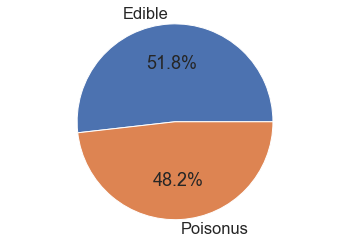

In [15]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
labels = 'Edible', 'Poisonus'
ax.pie(perc, labels = labels, autopct='%1.1f%%')
ax.axis('equal')

plt.show()

El gràfic ens mostra que l’atribut esta força balancejat ja que hi ha només un 3,6% mes de mostres comestibles a la base de dades. Considero que és un balanceig normal.

Ara realitzarem un pairplot per veure unes gràfiques generals de les nostres dades

<function matplotlib.pyplot.show(close=None, block=None)>

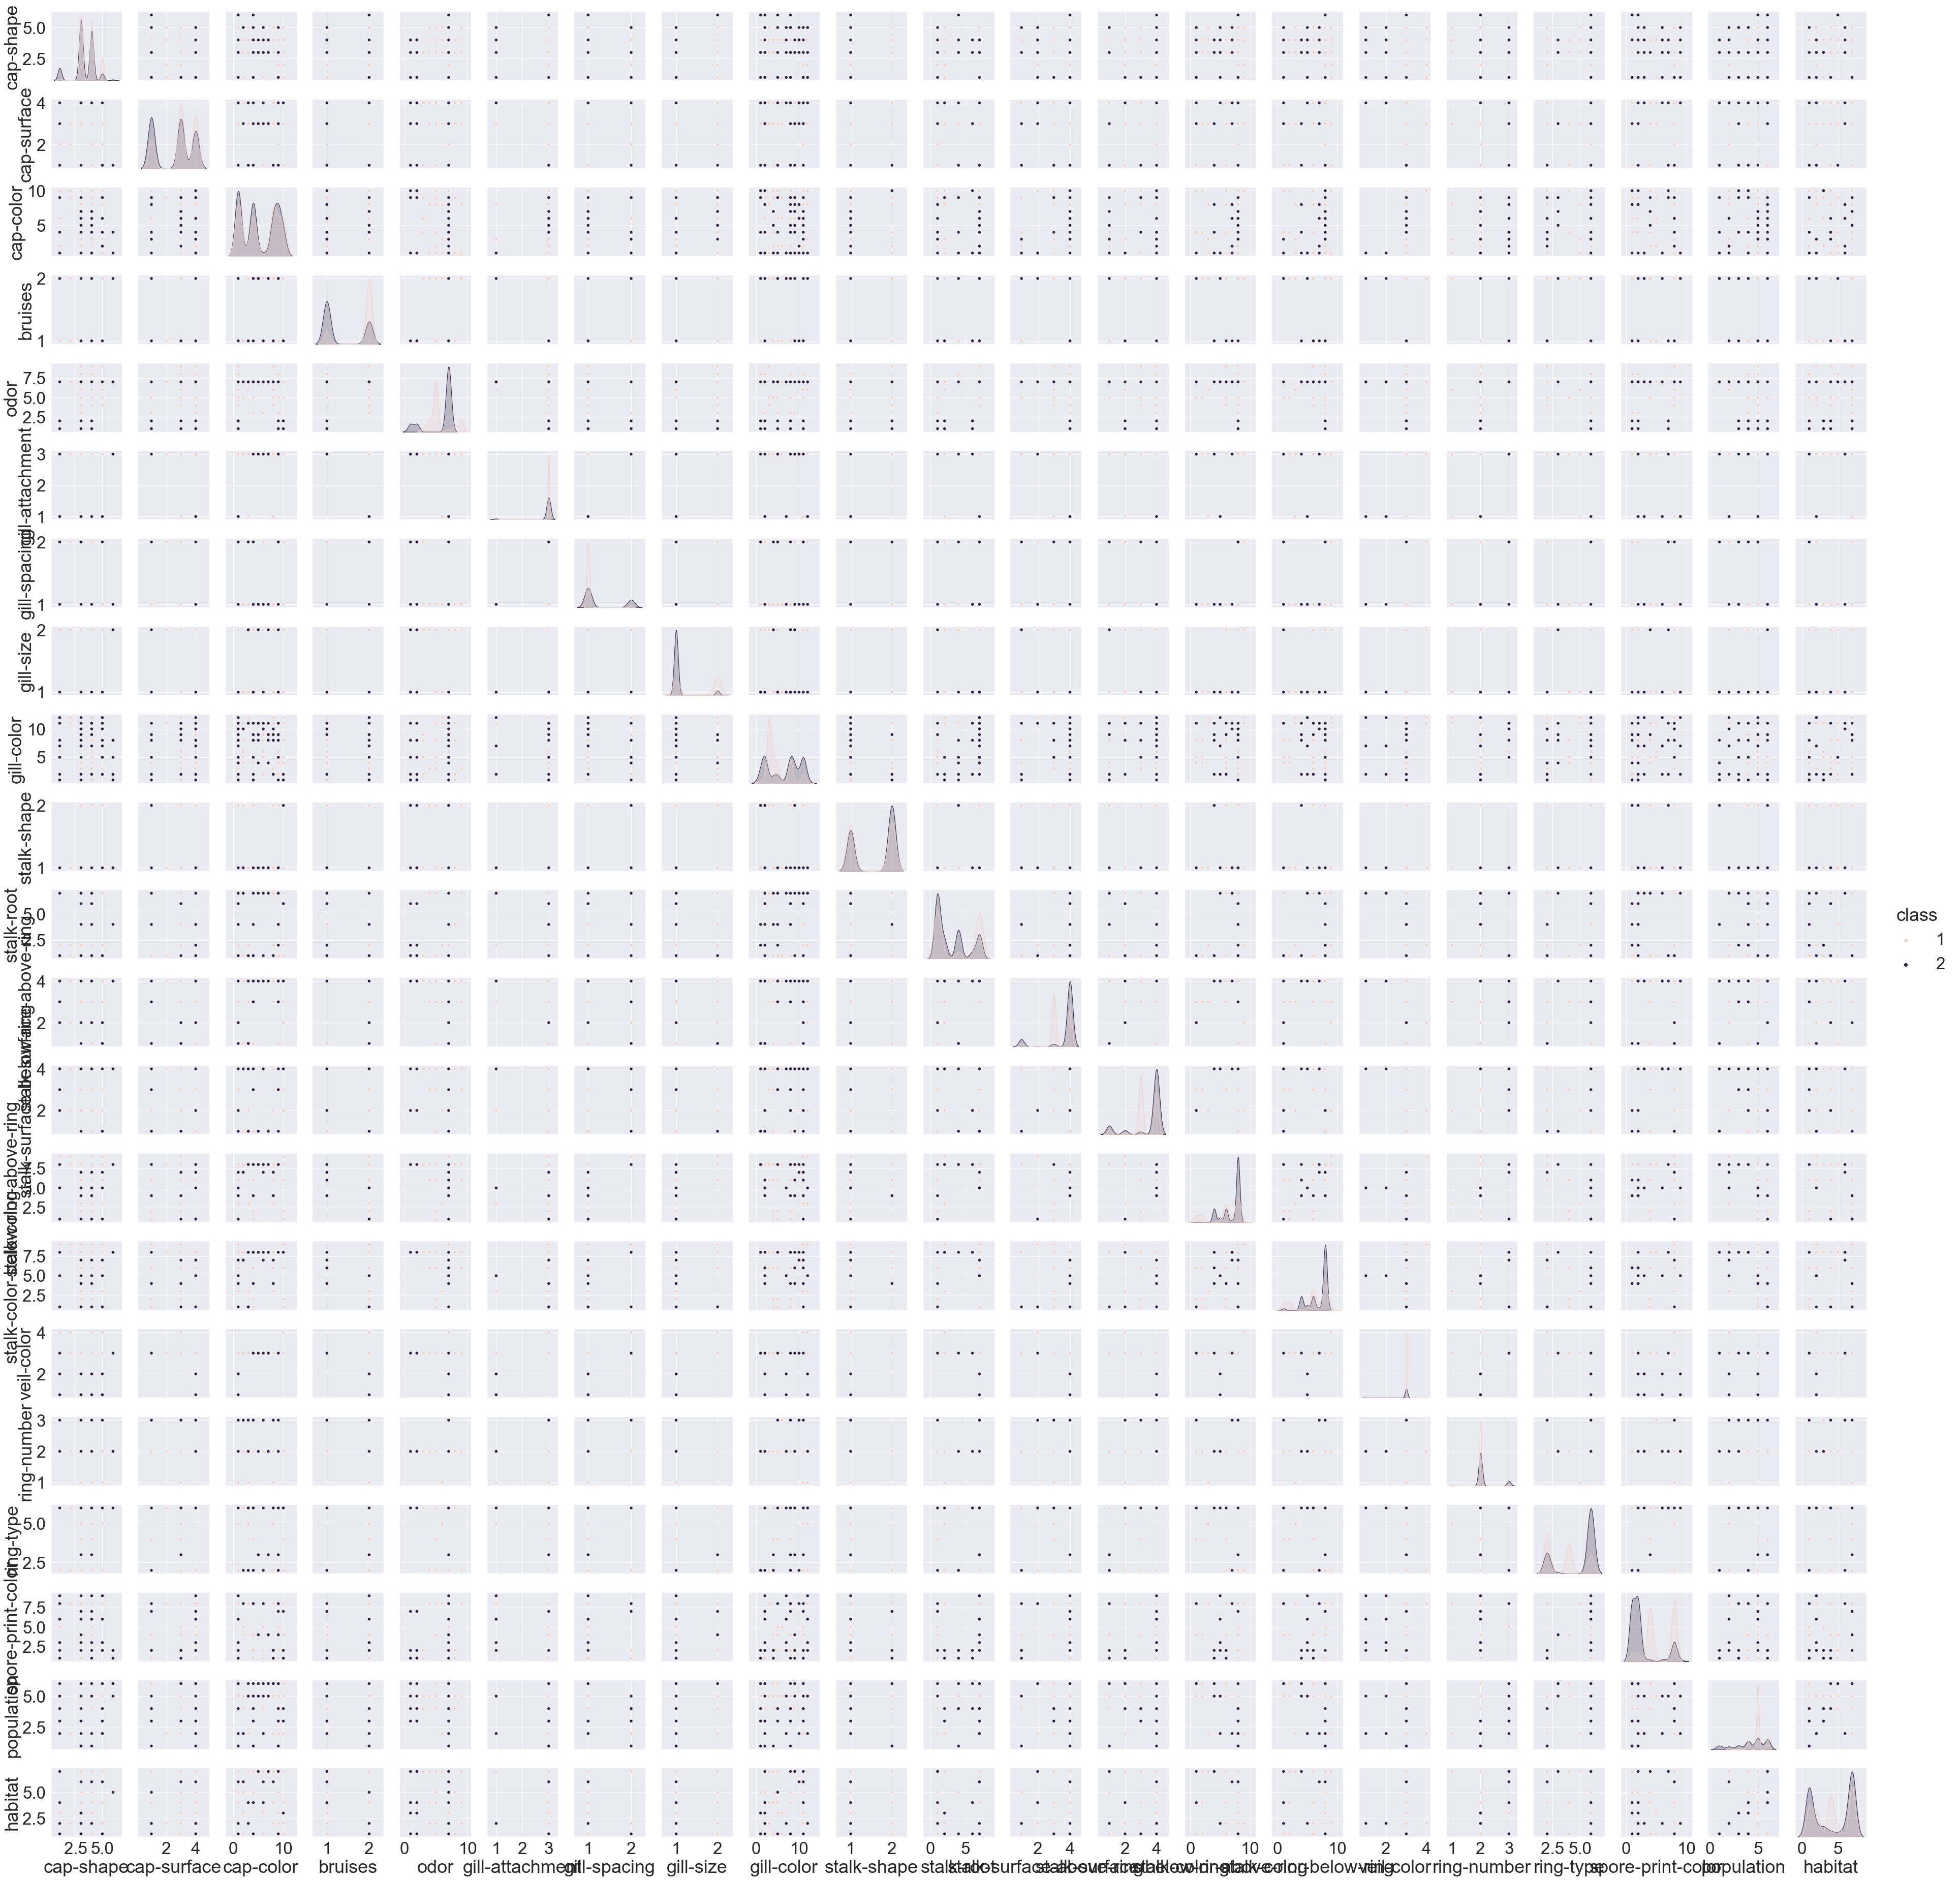

In [22]:
sns.pairplot(dataset, hue="class")
plt.show

# Prepocessing (normalitzation, outlier removal, feature selection..) 

Primerament, veure si la base de dades té moltes dades sense informació o si no en té cap dada sense informació.

In [16]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Com es pot veure a la imatge, no hi ha cap atribut sense informació.

A continuació, estudiare la base de dades per veure si hi ha una gran quantitat d’outliers(valors extrems o anormals) els quals poden afectar a l’hora de predir. Per comprovar aquests valors he realitzat les següents gràfiques:

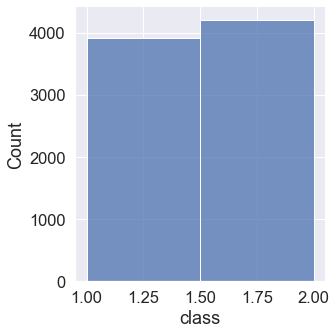

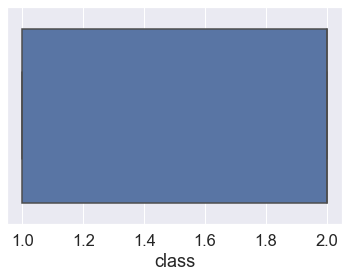

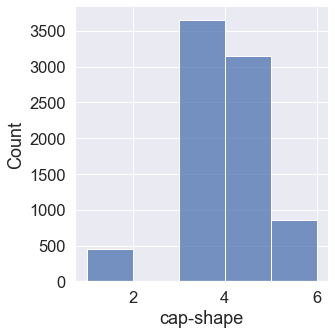

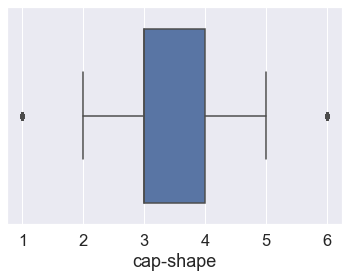

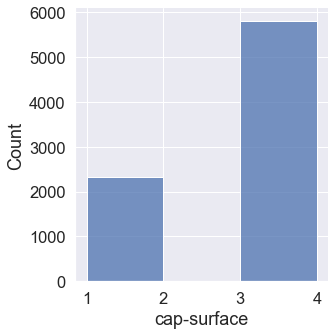

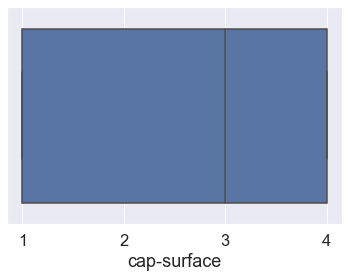

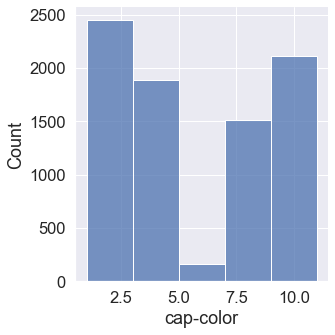

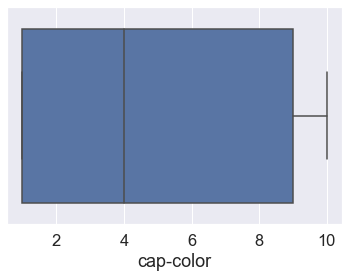

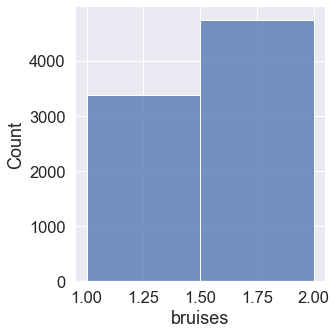

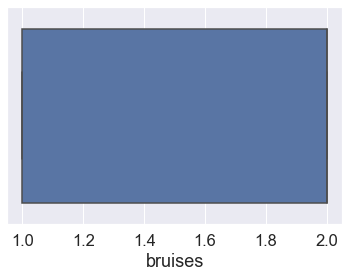

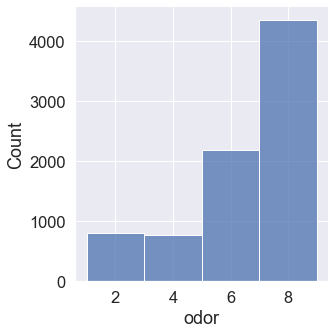

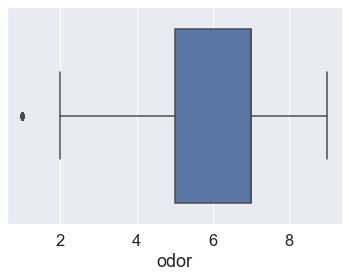

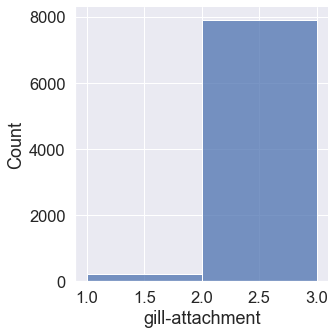

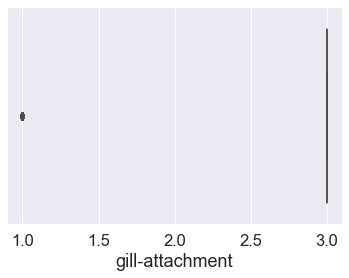

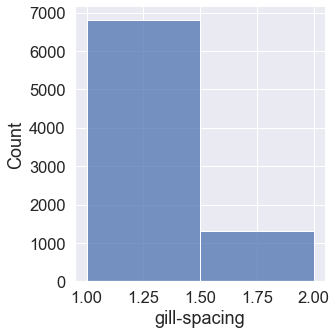

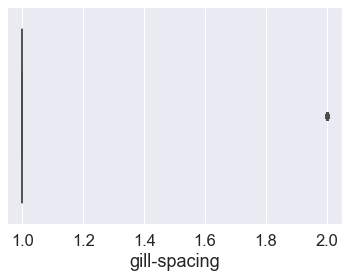

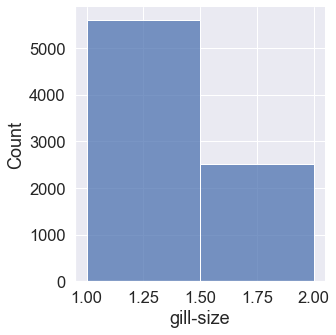

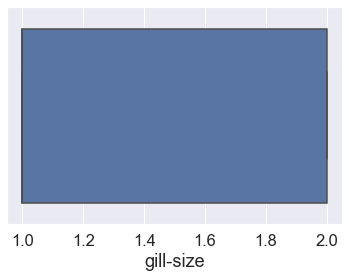

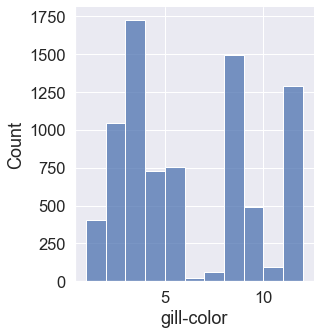

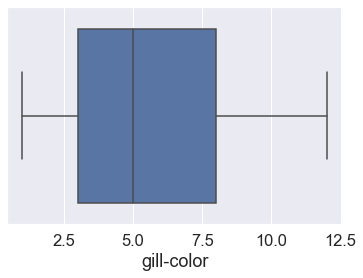

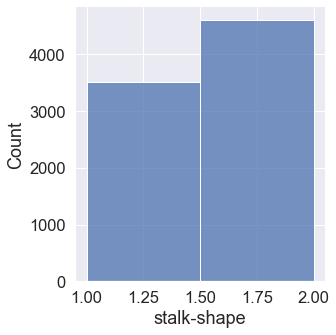

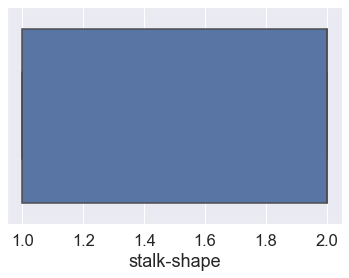

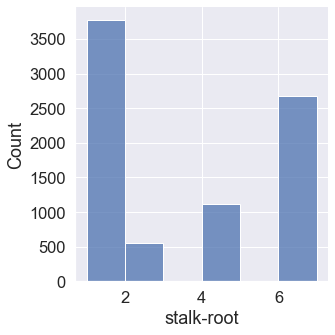

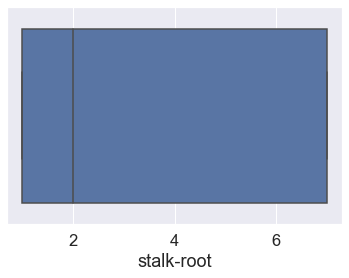

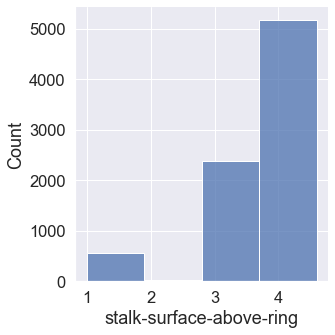

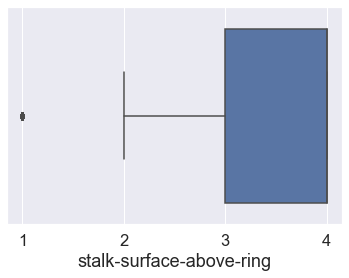

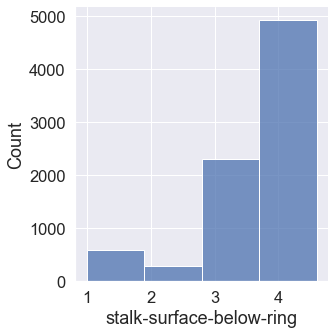

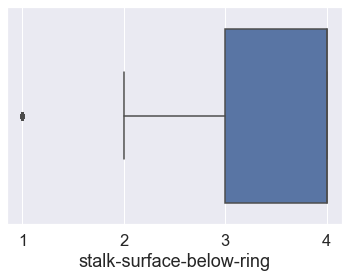

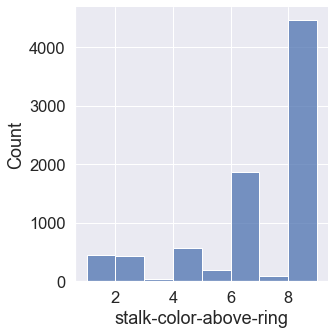

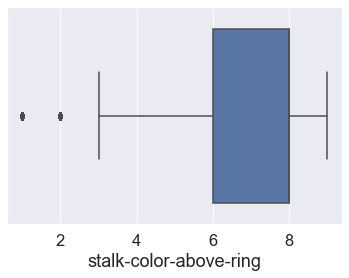

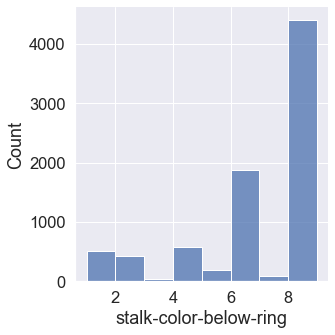

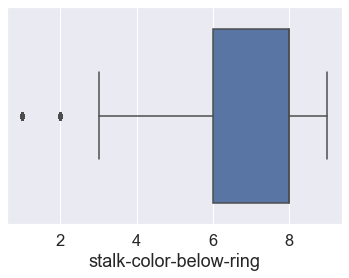

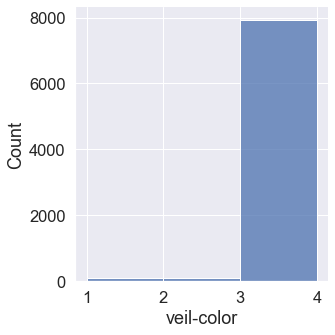

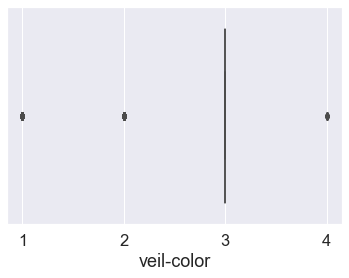

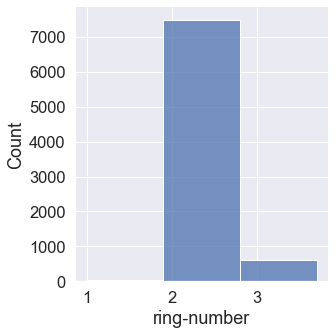

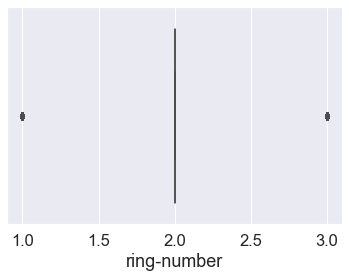

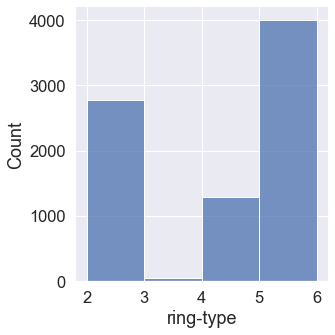

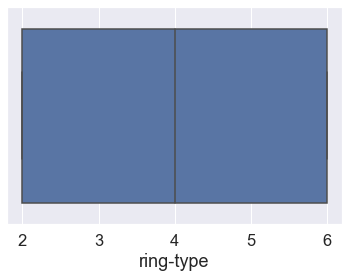

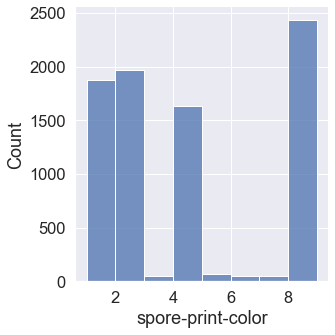

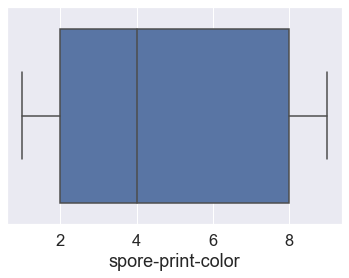

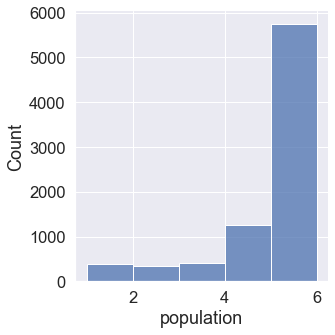

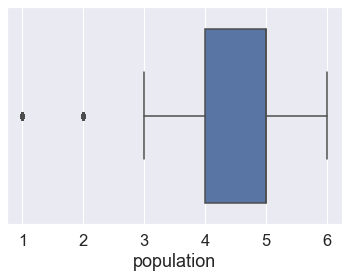

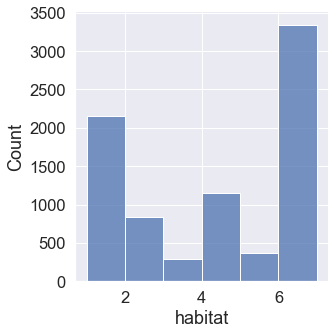

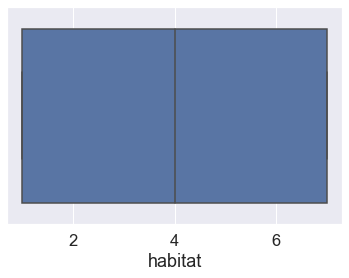

In [17]:
import warnings 
warnings.filterwarnings('ignore')
#outlier visualitzation
sns.displot(dataset['class'], binwidth=0.5, multiple="stack")
plt.show()
sns.boxplot(dataset['class'])
plt.show()

sns.displot(dataset['cap-shape'], binwidth=1, multiple="stack")
plt.show()
sns.boxplot(dataset['cap-shape'])
plt.show()

sns.displot(dataset['cap-surface'], binwidth=1, multiple="stack")
plt.show()
sns.boxplot(dataset['cap-surface'])
plt.show()

sns.displot(dataset['cap-color'], binwidth=2, multiple="stack")
plt.show()
sns.boxplot(dataset['cap-color'])
plt.show()

sns.displot(dataset['bruises'], binwidth=0.5, multiple="stack")
plt.show()
sns.boxplot(dataset['bruises'])
plt.show()

sns.displot(dataset['odor'], binwidth=2, multiple="stack")
plt.show()
sns.boxplot(dataset['odor'])
plt.show()

sns.displot(dataset['gill-attachment'], binwidth=1, multiple="stack")
plt.show()
sns.boxplot(dataset['gill-attachment'])
plt.show()

sns.displot(dataset['gill-spacing'], binwidth=0.5, multiple="stack")
plt.show()
sns.boxplot(dataset['gill-spacing'])
plt.show()

sns.displot(dataset['gill-size'], binwidth=0.5, multiple="stack")
plt.show()
sns.boxplot(dataset['gill-size'])
plt.show()

sns.displot(dataset['gill-color'], binwidth=1, multiple="stack")
plt.show()
sns.boxplot(dataset['gill-color'])
plt.show()

sns.displot(dataset['stalk-shape'], binwidth=0.5, multiple="stack")
plt.show()
sns.boxplot(dataset['stalk-shape'])
plt.show()

sns.displot(dataset['stalk-root'], binwidth=1, multiple="stack")
plt.show()
sns.boxplot(dataset['stalk-root'])
plt.show()

sns.displot(dataset['stalk-surface-above-ring'], binwidth=0.9, multiple="stack")
plt.show()
sns.boxplot(dataset['stalk-surface-above-ring'])
plt.show()

sns.displot(dataset['stalk-surface-below-ring'], binwidth=0.9, multiple="stack")
plt.show()
sns.boxplot(dataset['stalk-surface-below-ring'])
plt.show()

sns.displot(dataset['stalk-color-above-ring'], binwidth=1, multiple="stack")
plt.show()
sns.boxplot(dataset['stalk-color-above-ring'])
plt.show()

sns.displot(dataset['stalk-color-below-ring'], binwidth=1, multiple="stack")
plt.show()
sns.boxplot(dataset['stalk-color-below-ring'])
plt.show()

sns.displot(dataset['veil-color'], binwidth=1, multiple="stack")
plt.show()
sns.boxplot(dataset['veil-color'])
plt.show()

sns.displot(dataset['ring-number'], binwidth=0.9, multiple="stack")
plt.show()
sns.boxplot(dataset['ring-number'])
plt.show()

sns.displot(dataset['ring-type'], binwidth=1, multiple="stack")
plt.show()
sns.boxplot(dataset['ring-type'])
plt.show()

sns.displot(dataset['spore-print-color'], binwidth=1, multiple="stack")
plt.show()
sns.boxplot(dataset['spore-print-color'])
plt.show()

sns.displot(dataset['population'], binwidth=1, multiple="stack")
plt.show()
sns.boxplot(dataset['population'])
plt.show()

sns.displot(dataset['habitat'], binwidth=1, multiple="stack")
plt.show()
sns.boxplot(dataset['habitat'])
plt.show()


Com es pot observar, no hi han gaires dades anormals o valors extrems molts clars, per tant he decidit no eliminar-los ja que no afectaran gaire als models.

A la mateixa vegada he volgut comprovar si les dades estan normalitzades i com es pot veure en casos anteriors no ho estan. En el meu cas normalitzare les dades ja que algunes de les conseqüències de no fer-ho pot ser inexactitud de dades i/o ineficiència d’operacions i com el que es busca es trobar els millors resultats possibles és indispensable realitzar això.

En el meu cas, dintre de la normalització utilitzare la Standarization perquè amb aquest procés aconseguiré optimitzar l'aprenentatge del model de tal manera que tots els atributs d'entrada estaran dins de la mateixa escala y per tant no hi hauran atributs que tinguin un pes més elevat que altres només per l'escala de les seves dades.


In [18]:
#normalitzacio de dades utilitzant preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
standardized = scaler.fit_transform(dataset)
standardized_dataset = pd.DataFrame(standardized, columns=dataset.columns)

print(standardized_dataset)

         class  cap-shape  cap-surface  cap-color   bruises      odor  \
0    -1.036613  -0.545782     1.065669  -1.255302 -1.185917  1.115027   
1     0.964680  -0.545782     1.065669   1.357802 -1.185917 -2.413988   
2     0.964680  -2.764967     1.065669   1.067457 -1.185917 -1.909843   
3    -1.036613  -0.545782     0.217892   1.067457 -1.185917  1.115027   
4     0.964680  -0.545782     1.065669  -0.384267  0.843230  0.610882   
...        ...        ...          ...        ...       ...       ...   
8119  0.964680   1.673403     1.065669  -1.255302  0.843230  0.610882   
8120  0.964680  -0.545782     1.065669  -1.255302  0.843230  0.610882   
8121  0.964680   0.563811     1.065669  -1.255302  0.843230  0.610882   
8122 -1.036613   1.673403     0.217892  -1.255302  0.843230 -0.901553   
8123  0.964680  -0.545782     1.065669  -1.255302  0.843230  0.610882   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0            0.162896     -0.438864   1.494683   -1.4150

In [19]:
# PolynomialFeatures
poly = PolynomialFeatures(2)
polyDataset = poly.fit_transform(dataset)
polyDataset.shape

(8124, 276)

He intentat realitzar Polynomial Features. Aquest mètode el que farà es crear una versió al quadrat o al cub d'una variable d'entrada la qual canviarà la distribució de probabilitat, separant els valors petits i grans. Aquesta separació pot ajudar a que alguns algorismes d’aprenentatge automàtic facin millors prediccions ja que al estar més separats els valors serà més fàcil poder distingir entre ells i predir amb més eficàcia. 
Però, en el meu cas al no tenir molt pocs atributs no és convenient realitzar una polinomització ja que de tenir 22 atributs passem a 276.


#  Cross-validation

Cross-validation és una tècnica utilitzada per a avaluar els resultats d'una anàlisi estadística i garantir que són independents de la partició entre dades d'entrenament i prova. Realitzar Cross-Validation és important ja que permeteix comprovar que el model que s’està creant no produeixi overfiting. El que es fa es dividir el conjunt de dades d’entrenament en 2 subgrups, un per validar i un altre per entrenar. D’aquesta manera el que es fa es assegurar-se de que el model no faci prediccions de dades que ja havia vist abans, sinó que pugui fer prediccions de qualsevol dada.
Existeixen 3 maneres de realitzar cross-validation:

**- Cross-validation k-fold:** 
Les dades de mostra es divideixen en K subconjunts. Un dels subconjunts s’utilitza com a dades de prova i el resta (K-1) com a dades d’entrenament. El procés de validació creuada es repeteix durant k iteracions, amb cada un dels possibles subconjunts de dades de prova

**- Cross-validation sufflesplit:**
CV aleatòria consisteix en dividir de manera aleatòria el conjunt de dades en dos conjunts: conjunt de dades d’entrenament i conjunt de dades de prova. El resultat final s’obté a partir dels mitjans aritmètics dels valors obtinguts per a les diferents divisions

**- Leave-one-out:**
El mètode LOOCV és un mètode iteratiu que s'inicia emprant com a conjunt d'entrenament totes les observacions disponibles excepte una, que s'exclou per utilitzar-la com a test. 


Per realitzar el cross-validation utilitzare el mètode de cross-validation k-fold ja que és el més adequat per al meu problema.

Per implementar-lo he escollit el StratifiedKFold que es la versió millorada del KFold. 

És important escollir un bon valor de K per a que el model no pateixi una variança elevada o un bias elevat. A més, el valor de k també depèn del tamany del conjunt de dades ja que una k elevada significa que només és possible un baix nombre de combinacions de mostres, la qual cosa limita el nombre d'iteracions que són diferents. Per això, realitzare els següents càlculs per escollir un bon valor de K. 


In [32]:
# escollir la millor K per al nostre problema

folds = range(2,15)

def evaluatemodel(cv, standar):
    
    x = standar[:,[8]]
    y = standar[:,9]
    lab = preprocessing.LabelEncoder()
    y_transformed = lab.fit_transform(y)
    
    logReg = LogisticRegression()
    scores = cross_val_score(logReg, x, y_transformed, scoring='accuracy', cv=cv, n_jobs=-1)
    return mean(scores), scores.min(), scores.max()

for k in folds:
    cv = KFold(n_splits=k, shuffle=True, random_state=10)
    k_mean, k_min, k_max = evaluatemodel(cv, standardized)
    print('-> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))


-> folds=2, accuracy=0.374 (0.366,0.382)
-> folds=3, accuracy=0.374 (0.363,0.385)
-> folds=4, accuracy=0.374 (0.364,0.382)
-> folds=5, accuracy=0.374 (0.363,0.385)
-> folds=6, accuracy=0.374 (0.360,0.387)
-> folds=7, accuracy=0.374 (0.357,0.397)
-> folds=8, accuracy=0.374 (0.360,0.390)
-> folds=9, accuracy=0.374 (0.353,0.405)
-> folds=10, accuracy=0.374 (0.347,0.400)
-> folds=11, accuracy=0.374 (0.352,0.410)
-> folds=12, accuracy=0.374 (0.340,0.399)
-> folds=13, accuracy=0.374 (0.342,0.403)
-> folds=14, accuracy=0.374 (0.349,0.407)


Com es pot observar per veure quin és el millor valor de K he realitzat la regressió logística que calcula en cada cas el cross validation en funció de la K. Normalment s’acostuma a escollir la K 5 o 10 però en el meu cas tots els valors son iguals aixi que es igual quin escolli.

# Metric Analysis

A continuació, haure de trobar quina mètrica serà la més adient pel problema. Primerament vaig pensar en 3 mètriques:

**-Accuracy_score:** Aquesta mètrica representa el percentatge total de valors correctament classificats, tant positius com negatius.

**-F1_score:** Aquesta és una mètrica molt utilitzada en problemes en els quals el conjunt de dades a analitzar està desbalançada.

**-Average_precision_score:** Calcula la mitjana de la precisió a partir dels valors de predicció. Es calcula la precisió de manera incremental, i finalment es calcula la mitjana.

Per al meu conjunt de dades he escollit la **F1_score**.

A l’hora de visualitzar els models visualitzare també dues gràfiques anomenades Precision-Recall Curve i la ROC Curve

La **Precision-Recall** Curve és el resultat de dibuixar la gràfica entre el precision i el recall. L'ideal seria una corba que s'acosti el màxim possible a la cantonada superior dreta (alta precisió i alt recall).

La **ROC curve** és semblant a la Precision-Recall Curve però canviant alguns valors. Relaciona el recall amb el ràtio de falsos positius. És a dir relaciona la sensibilitat del nostre model amb les fallades optimistes (classificar els negatius com a positius). Té sentit ja que, generalment, si augmentem el recall, el nostre model tendirà a ser més optimista i introduirà més falsos positius en la classificació. L'ideal seria una corba que s'acosti el màxim possible a la cantonada superior esquerra.

En el codi, he realitzat dues funcions per crear i visualitzar cadascuna d’aquestes gràfiques:


In [33]:
#0.374

# PR Curve and Roc Curve functions

from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

def PRCurve(y_v,probs, n_classes):
    precision = {}
    recall = {}
    average_precision = {}
    plt.figure()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
        average_precision[i] = average_precision_score(y_v == i, probs[:, i])

        plt.plot(recall[i], precision[i],
        label='Precision-recall curve of class {0} (area = {1:0.2f})'
                               ''.format(i, average_precision[i]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc="upper right")
        
def RocCurve(y_v, probs, n_classes):
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    # Plot ROC curve
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
    plt.legend()


A continuació aplicare tot l’explicat anteriorment i visualitzare els resultats per cada model. A més del F1_score i les gràfiques de Precision-Recall Curve i de ROC Curve
també he visualitzat la confusión matrix i els nombres d’encerts i errades de cada model.


LOGISTIC REGRESION 

Logistic Regression Score:  0.4073846153846154
Logistic Regression Cross Val Score:  0.42791292993776225 

963 Errores de clasificacion de un total de 1625
662 Aciertos de clasificacion de un total de 1625 

Confusion matrix:
[[  1  15   0   0   1   0   0  40   0   0  25   0]
 [  8  19   0   0   4   0   4  51   0   0 110   7]
 [  0   0 325   0   0   0   0   0   0   0   0   0]
 [  4   7   0  56  25   0   0  46   0   0   0   0]
 [  8  16   2  59  33   4   0  23   0   0  12   0]
 [  0   0   0   0   0   0   0   3   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0  11]
 [ 10  24   4  59  40   0   0  84   0   0 106   0]
 [  3   3   1   0   2   0   0   9   0   0  83   0]
 [  0   0   0   0   0   0   0   0   0   8  14   0]
 [  6  31   2   1   4   4   0  59   0   6 123   0]
 [  1   0   0   4   0   0   1   1   0   0   0  12]] 

Logistic Regression F1 Score: 0.4073846153846154


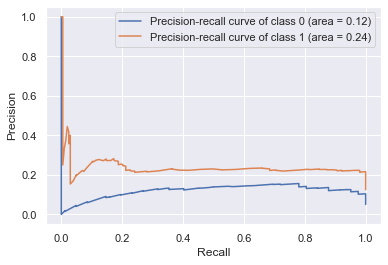

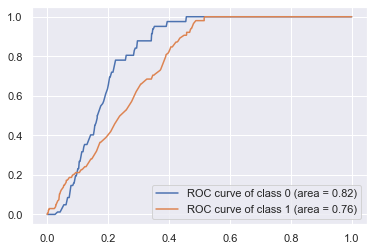

In [48]:
sns.set(font_scale = 1)

k = 3
x = standardized[:,[0,1,2,3,4,5,6,7,8]]
y = standardized[:,9]

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y_transformed, test_size=0.20, random_state=39) #39

## LOGISTIC REGRESION
print("LOGISTIC REGRESION", "\n")

log_reg = LogisticRegression() # creem el regresor logistic
log_reg.fit(x_train, y_train) # entrenem el regresor logistic amb les dades de train

kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=7)
print("Logistic Regression Score: ", log_reg.score(x_test, y_test)) # retorna la prescisio del model, com de bo ha sigut
print("Logistic Regression Cross Val Score: ", np.mean(cross_val_score(log_reg, x_train, y_train, cv=kfold)), "\n") # evalua els resultats del model utilitzat


prediction = log_reg.predict(x_test) # realizar predicciones con el modelo

# log_reg.score es igual a hacer esto
#print(accuracy_score(y_test, prediction))

n_errors = sum(y_test != prediction)
print("{0} Errores de clasificacion de un total de {1}".format(n_errors, len(y_test)))
print("{0} Aciertos de clasificacion de un total de {1}".format(len(y_test)-n_errors, len(y_test)), "\n")
print("Confusion matrix:")
print(confusion_matrix(y_test, prediction), "\n")

print("Logistic Regression F1 Score:", f1_score(y_test, prediction, average='micro'))

probs = log_reg.predict_proba(x_test)
PRCurve(y_test,probs,2)
RocCurve(y_test,probs,2)

## como hacer un grafico de la regresion logistica?


Com es pot observar, per aquest model, s’aconsegueixen valors de Score, Cross Val Score i F1 Score molt baixos. Aquest valors indiquen una molt baixa precisió del model alhora de realitzar les prediccions, aquest fenomen pot ser degut a la correlació dels atributs de la base de dades.


NEAREST K NEIGHBORS 

k=1: 920.109 errores de clasificación de un total de 1625
k=2: 920.096 errores de clasificación de un total de 1625
k=3: 927.693 errores de clasificación de un total de 1625
k=4: 933.55 errores de clasificación de un total de 1625
k=5: 933.705 errores de clasificación de un total de 1625
k=6: 935.644 errores de clasificación de un total de 1625
k=7: 938.564 errores de clasificación de un total de 1625
k=8: 940.675 errores de clasificación de un total de 1625
k=9: 942.616 errores de clasificación de un total de 1625
k=10: 944.828 errores de clasificación de un total de 1625


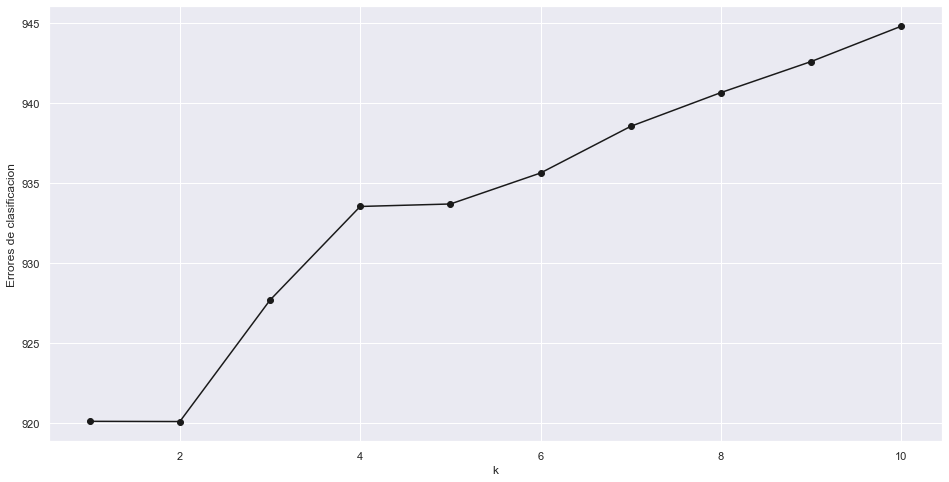

Nearest K Neighbour Score:  0.4006153846153846
Nearest K Neighbour Cross Val Score:  0.41360118899244563 

974 Errores de clasificacion de un total de 1625
651 Aciertos de clasificacion de un total de 1625 

Confusion matrix:
[[ 32  18   0  10   9   0   0   9   0   0   4   0]
 [ 28  51   0  19  12   0   2  44  19   0  24   4]
 [  0   0 325   0   0   0   0   0   0   0   0   0]
 [ 14   4   0  40  46   0   0  22   3   0   9   0]
 [ 17  11   0  52  46   4   0  16   0   0  11   0]
 [  0   0   0   0   1   0   0   0   0   0   2   0]
 [  0   3   0   0   0   0   4   0   0   0   0   5]
 [ 29  50   0  60  48   0   0  75  22   0  43   0]
 [  0  28   0   0   2   0   0  42  14   0  15   0]
 [  0   0   0   0   0   0   0   1   1   7  13   0]
 [ 13  35   2   3  21   4   0  71  17  16  54   0]
 [  0   4   0   2   1   0   2   1   0   0   6   3]] 

Nearest K Neighbour F1 Score: 0.4006153846153846


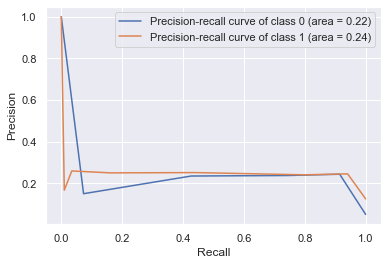

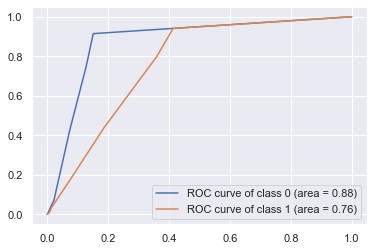

In [49]:
sns.set(font_scale = 1.0)

## NEAREST K NEIGHBORS
print("NEAREST K NEIGHBORS", "\n")

template = "k={0}: {1} errores de clasificación de un total de {2}"

# Entrenem el model per determinar la k

mean_error_for_k = []
for k in range(1,11):
    errors_k = []
    for i in range(1000):
        
        kNN = KNeighborsClassifier(n_neighbors=k) # Creem el model
        X_train, X_valid, Y_train, Y_valid = sklearn.model_selection.train_test_split(x_train, y_train, train_size=0.75)
        kNN.fit(X_train, Y_train) # Entrenem el model
 
        Y_valid_pred = kNN.predict(X_valid) # Realitzem prediccions
        n_errors = sum(Y_valid!=Y_valid_pred) # Contem errors
        errors_k.append(n_errors)
        
    errors = np.array(errors_k).mean()
    print (template.format(k, errors, len(Y_valid)))
    mean_error_for_k.append(errors)


plt.figure(figsize=(16,8))
plt.plot(range(1,11), mean_error_for_k, '-ok')
plt.xlabel("k")
plt.ylabel("Errores de clasificacion")
plt.show()

# escollim k = 10 
k = 10

# entrenem el model per a k = 10
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(x_train, y_train)

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
print("Nearest K Neighbour Score: ", kNN.score(x_test, y_test)) # retorna la prescisio del model, com de bo ha sigut
print("Nearest K Neighbour Cross Val Score: ", np.mean(cross_val_score(kNN, x_train, y_train, cv=kfold)), "\n") # evalua els resultats del model utilitzat

predictionKNN = kNN.predict(x_test)
n_errors = sum(y_test != predictionKNN)
print("{0} Errores de clasificacion de un total de {1}".format(n_errors, len(y_test)))
print("{0} Aciertos de clasificacion de un total de {1}".format(len(y_test)-n_errors, len(y_test)), "\n")
print("Confusion matrix:")
print(confusion_matrix(y_test, predictionKNN), "\n")

print("Nearest K Neighbour F1 Score:", f1_score(y_test, predictionKNN, average='micro'))

probs = kNN.predict_proba(x_test)
PRCurve(y_test,probs,2)
RocCurve(y_test,probs,2)


Una vegada executat, es pot veure com el model KNN dona més o menys els mateixos resultats de precisió alhora de predir una dada que el model de regressió logística. Aquests continuen sent valors molt baixos. Aquest fet pot ser degut a que l’algorisme KNN dona el mateix pes a tots els atributs encara que alguns tinguin pitjor correlació amb l’atribut a prediure.

Abans de posar en pràctica el model SVM, s’han d’especificar 2 valors molt importants que influeixen directament en els resultats obtinguts. Aquests son la C i gamma.

El paràmetre C indica a l'optimització del SVM quant vol evitar la classificació errònia de cada exemple d'entrenament. Per a valors grans de C, l'optimització triarà un hiperplà de marge més petit però tots els punts d'entrenament estaran classificats correctament. Per contra, un valor molt petit de C farà que l'optimització seleccioni un hiperplà de marge més gran però es poden classificar erròniament els punts d’entrenament. 

Gamma es fins on arriba la influència d’un sol exemple d’entrenament, amb valors baixos que signifiquen “lluny” i valors alts que signifiquen “a prop”. Els valors més baixos de gamma donen com a resultat models amb menor precisió i el mateix que els valors més alts de gamma. Són els valors intermedis de gamma els que donen un model amb bons límits de decisió.

Per tant, per al meu problema els valors de C i gamma que hem permeten obtenir una major precisió son C = 0.9 i gamma = 0.1.



SVM with rbf kernel Score:  0.4024615384615385
SVM with rbf kernel Cross Val Score:  0.4314517704002638 

971 Errores de clasificacion de un total de 1625
654 Aciertos de clasificacion de un total de 1625 

Confusion matrix:
[[  0  10   0   0   5   0   0  38   0   0  29   0]
 [  0   6   0   0   6   0   0  47   6   0 127  11]
 [  0   0 325   0   0   0   0   0   0   0   0   0]
 [  0   0   0  49  32   0   0  55   0   0   2   0]
 [  0  18   2  71  20   4   0  23   5   0  14   0]
 [  0   0   0   0   0   0   0   0   0   0   3   0]
 [  0   0   0   0   0   0   0   0   0   0   0  12]
 [  0   3   4  67  35   0   0  82   3   0 133   0]
 [  0   2   1   0   2   0   0   3   1   0  92   0]
 [  0   0   0   0   0   0   0   0   0   0  22   0]
 [  0  13   2   1   0   4   0  54   0   0 162   0]
 [  0   0   0   4   0   0   0   0   0   0   6   9]] 

SVM with rbf kernel F1 Score: 0.4024615384615385 

SVM Linear Score:  0.4086153846153846
SVM Linear Cross Val Score:  0.4312980189282621 

961 Errores de clasif

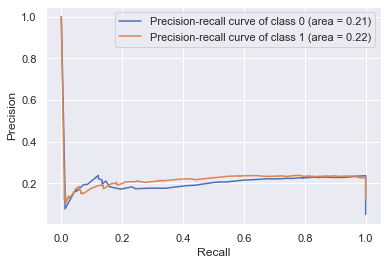

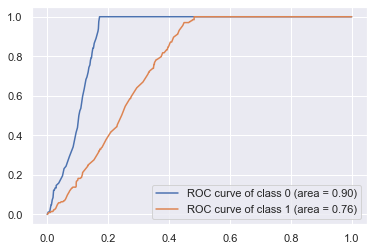

In [51]:
# SVM

# C = 0.9
# G = 0.1

C = 1.25
G = 0.1

k = 3
x = standardized[:,[0,1,2,3,4,5,6,7,8]]
y = standardized[:,9]

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y_transformed, test_size=0.20, random_state=39)

kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=7)

# SVM rbf kernel

svc_rbf = svm.SVC(C=C, kernel='rbf', probability=True, gamma=G)
svc_rbf.fit(x_train, y_train)

print("SVM with rbf kernel Score: ", svc_rbf.score(x_test, y_test)) # retorna la prescisio del model, com de bo ha sigut
print("SVM with rbf kernel Cross Val Score: ", np.mean(cross_val_score(svc_rbf, x_train, y_train, cv=kfold)), "\n") # evalua els resultats del model utilitzat

prediction = svc_rbf.predict(x_test)
n_errors = sum(y_test != prediction)
print("{0} Errores de clasificacion de un total de {1}".format(n_errors, len(y_test)))
print("{0} Aciertos de clasificacion de un total de {1}".format(len(y_test)-n_errors, len(y_test)), "\n")
print("Confusion matrix:")
print(confusion_matrix(y_test, prediction), "\n")

print("SVM with rbf kernel F1 Score:", f1_score(y_test, prediction, average='micro'), "\n")


probs = svc_rbf.predict_proba(x_test)
PRCurve(y_test,probs,2)
RocCurve(y_test,probs,2)

# SVM with other kernels

svc_linear = svm.LinearSVC(C=1.0, max_iter=1000, tol=0.0001)
svc_linear.fit(x_train, y_train)

print("SVM Linear Score: ", svc_linear.score(x_test, y_test)) # retorna la prescisio del model, com de bo ha sigut
print("SVM Linear Cross Val Score: ", np.mean(cross_val_score(svc_linear, x_train, y_train, cv=kfold)), "\n") # evalua els resultats del model utilitzat

prediction = svc_linear.predict(x_test)
n_errors = sum(y_test != prediction)
print("{0} Errores de clasificacion de un total de {1}".format(n_errors, len(y_test)))
print("{0} Aciertos de clasificacion de un total de {1}".format(len(y_test)-n_errors, len(y_test)), "\n")
print("Confusion matrix:")
print(confusion_matrix(y_test, prediction), "\n")

print("SVM Linear F1 Score:", f1_score(y_test, prediction, average='micro'))


El SVM és un model per a classificacions de dos grups cosa que a priori beneficiaria al meu problema. He utilitzat dos tipus de SVM: el SVC amb rbf kernel i el SVC linear
El primer d’aquests dos, encara que els seus resultats segueixen sent molt inferiors als desitjats, en comparació als altres dos models vists anteriorment és practicament igual. Els seus valors són una mica més elevats i per tant el seu nombre d’encerts també és una mica més elevat. 
En canvi el segon dona exactament igual que els dos anteriors models.

La funció classification_report el que fa és mostrar les principals mètriques de classificació. Entre elles tenim, l’accuracy, el f1_score i més. Aquesta funció és molt útil si vols saber en general els resultats proporcionats per cadascun dels teus models. Com abans ja havia determinat quines mètriques eren les més rellevants per valorar els nostres models m'he focalitzat en aquestes i no he visualitzat totes aquestes mètriques ja que algunes eren irrellevants.


In [38]:
# clasification report 
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9', 'class 10', 'class 11']

print("Logistic Regression")
print(classification_report(y_test, log_reg.predict(x_test), target_names=target_names), "\n")

print("Nearest K Neighbour")
print(classification_report(y_test, kNN.predict(x_test), target_names=target_names), "\n")

print("SVM")
print(classification_report(y_test, svc_rbf.predict(x_test), target_names=target_names), "\n")

Logistic Regression
              precision    recall  f1-score   support

     class 0       0.02      0.01      0.02        82
     class 1       0.17      0.09      0.12       203
     class 2       0.97      1.00      0.99       325
     class 3       0.31      0.41      0.35       138
     class 4       0.30      0.21      0.25       157
     class 5       0.00      0.00      0.00         3
     class 6       0.17      0.08      0.11        12
     class 7       0.27      0.26      0.26       327
     class 8       0.00      0.00      0.00       101
     class 9       0.57      0.36      0.44        22
    class 10       0.26      0.52      0.35       236
    class 11       0.40      0.63      0.49        19

    accuracy                           0.41      1625
   macro avg       0.29      0.30      0.28      1625
weighted avg       0.38      0.41      0.38      1625
 

Nearest K Neighbour
              precision    recall  f1-score   support

     class 0       0.24      0.39   

# Hyperparameter Search

**Exhaustive Grid Search:**
Es basa en una recerca exhaustiva a través d'una quadrícula de valors de paràmetres especificada manualment de l'espai de hiperparàmetres. Aquest és un enfocament de força bruta perquè prova totes les combinacions de hiperparàmetres d'una quadrícula de valors de paràmetres. Després, per a cada combinació de hiperparàmetres, el model s'avalua utilitzant la cross-validation de kfold. Llavors, la combinació que ens dona la millor mètrica és la que retorna l'objecte que usarem 

**Randomized Parameter Optimization:**
Fa una cerca de paràmetres de forma aleatòria a on les configuracions es mostren a partir d'una distribució de possibles valors i paràmetres. La cerca aleatòria prova una combinació aleatòria de hiperparàmetres en cada iteració i registra el rendiment del model. Després de diverses iteracions, retorna la mescla que va produir el millor resultat.

Parlant sobre cost computacional els dos mètodes són costosos. L’EGS és costos ja que el seu objectiu és provar amb totes les combinacions que s’han entrat al grid. Per altra banda el random és costos ja que agafa un número de vegades valors aleatoris de les dades que s’han entrat però si no és vol no s'agafen totes les combinacions. Això últim el que pot provocar és no trobar el més òptim per tant si no tenim un límit de temps predefinit la millor opció es provar totes les combinacions possibles i trobar el més òptim.

Existeixen mètodes de cerca més eficients com és el cas del **Bayesian optimization search**. Els dos mètodes vistos anteriorment són relativament ineficients perquè sovint avaluen moltes combinacions de hiperparàmetres inadequades. No tenen en compte els resultats de les iteracions anteriors en triar els següents hiperparàmetres. Per altre banda, la Bayesian optimization tracta la cerca dels hiperparàmetres òptims com un problema d'optimització. En triar la següent combinació de hiperparàmetres, aquest mètode considera els resultats de l'avaluació anterior. Després aplica una funció probabilística per a seleccionar la combinació que probablement produirà els millors resultats. Aquest mètode descobreix una combinació de hiperparàmetres bastant bona en relativament poques iteracions.

A continuació, posare a prova els dos mètodes de cerca de paràmetres que s’han vist anteriorment per al model seleccionat, en el meu cas, el SVM. 
Inicialitzare una variable amb un diccionari que contingui una llista amb tots els possibles paràmetres a provar. Finalment, els mètodes ens retornaran la combinació de paràmetres amb la que el model SVC obté els millors resultats.



In [39]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[0,0.2,0.5,0.75,1,1.25,1.5], 'gamma':[0.09,0.08,0.07,0.1]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
search = clf.fit(x_train,y_train)
print("GridSearchCV: ", search.best_params_)

# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(svc, parameters, random_state=0)
search = clf.fit(x_train,y_train)
print("RandomizedSearchCV: ", search.best_params_)

GridSearchCV:  {'C': 0.5, 'gamma': 0.07, 'kernel': 'rbf'}
RandomizedSearchCV:  {'kernel': 'linear', 'gamma': 0.09, 'C': 1.25}


El mètode que retorna els paràmetres amb els quals el model obté els millors resultats es el RandomizedSearchCV. 

# Comparativa de models 


En aquest apartat l’objectiu serà aprendre a comparar el rendiment obtingut amb els diferents models per a la base de dades. 
A la primera part d’aquest apartat, es compararà els resultats de precisió obtinguts per als models de regressió logística i SVM amb el kernel de linear. Els models s’executaran per a diferents particions de dades, és a dir, el codi mostra la precisió de cada model per a un conjunt de 50%, 70% i 80% de dades.

En les següents gràfiques es pot veure com estan classificades les nostres dades per als primers dos atributs (“ph” i “Hardness”).


Correct classification Logistic  0.5 % of the data:  0.3380108321024126
Correct classification SVM       0.5 % of the data:  0.3380108321024126
Correct classification Logistic  0.7 % of the data:  0.33305988515176377
Correct classification SVM       0.7 % of the data:  0.33305988515176377
Correct classification Logistic  0.8 % of the data:  0.3686153846153846
Correct classification SVM       0.8 % of the data:  0.3464615384615385


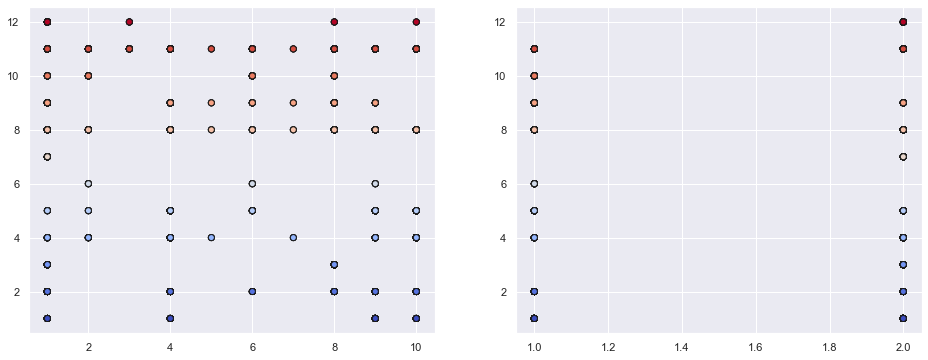

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

# llegim les dades del csv
#def load_dataset(path):
    #dataset = pd.read_csv(path, header=0, delimiter=',')
    #return dataset

# carreguem dataset 
#dataset = load_dataset('mushrooms.csv')

dataset['class'].fillna(value=dataset['class'].median(),inplace=True)
dataset['cap-shape'].fillna(value=dataset['cap-shape'].median(),inplace=True)
dataset['cap-surface'].fillna(value=dataset['cap-surface'].median(),inplace=True)

data = dataset.values

X = data[:, [3,4]]
y = data[:,9]

n_classes = 2
    
fig, sub = plt.subplots(1, 2, figsize=(16,6))
sub[0].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')

particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)

    print ("Correct classification Logistic ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Creem el SVM
    svc = svm.SVC(C=10.0, kernel='linear', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    print ("Correct classification SVM      ", part, "% of the data: ", svc.score(x_v, y_v))



Com es pot veure, s'estan calculant els resultats per només el 50% de la base de dades, 
per molt molt poc més la regressió logística és millor que el SVM. Això succeeix per les tres 
particions. 
Per altra banda, aquests valors de precisió segueixen sent molt baixos per models de 
classificacions. El motiu pot ser la falta de normalització de les dades.

Arà visualitzare les gràfiques corresponents a la Precision-recall curve i a la ROC curve.


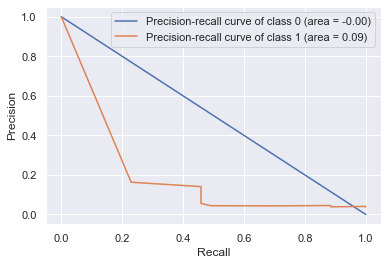

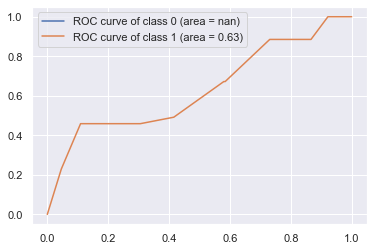

In [30]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc
sns.set(font_scale = 1.0)

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()


A la gràfica de Precision-recall l’ideal seria tenir un resultat que s’apropés a la cantonada superior dreta, per així tenir una precision i un recall d’1.
Però no és el cas. Era d’esperar que no s’acostés a aquest valor ideal ja que en l’anterior prova ja es veia el baix valor de score dels models. Podem observar com quant major precisió tenim, menor recall obtindrem i viceversa.

A la gràfica de ROC l’ideal seria tenir un resultat que s’apropés a la cantonada superior esquerra (punt on s’obté la màxima precisió del model), per així tenir el menor nombre de falsos positius i el major nombre de verdaders positius. Com es pot observar la  gràfica es troba lluny d’aquest punt ideal ja que detecta molts falsos positius.
L’àrea inferior a la corba es el AUC. Indica en quina mesura el model és capaç de distingir entre les classes. Com més alt sigui el AUC, millor serà el model per a predir la probabilitat de la classe SÍ més alta que la probabilitat de la classe NO. Com es pot observar, l’àrea de la  AUC no es bona perquè la ROC curve no s’apropa al punt ideal.


In [24]:
import numpy as np
import matplotlib.pyplot as plt


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(C, gamma, degree):

    

    X = data[:,:2]
    y = data[:,9]

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=100),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C))
    models = (clf.fit(X, y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(2, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('class')
        ax.set_ylabel('cap-shape')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()


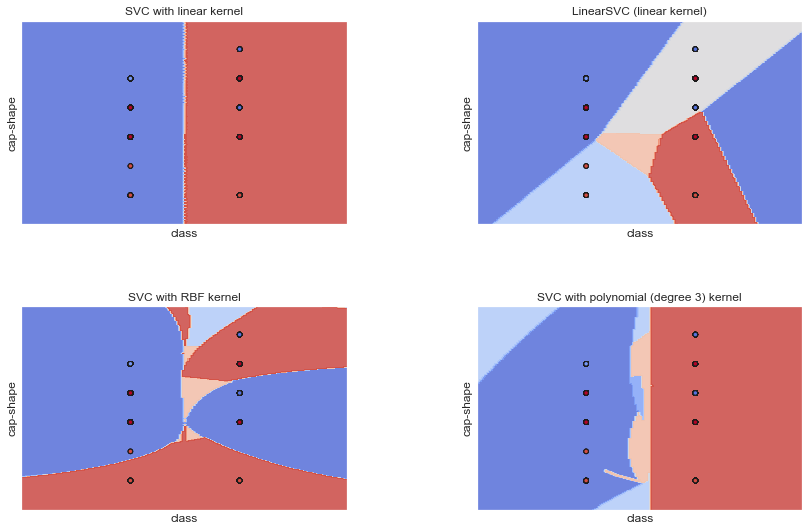

In [25]:
show_C_effect(1.25,0.1,2)